# <span style="color:blue">Prueba - Predicción del precio de vuelos</span>

## <span style="color:orange">Análisis inicial del desarrollo del proyecto según el método CRISP-DM</span>

El método CRISP-DM (Cross Industry Standard Process for Data Mining) servirá como guía estructurada para abordar este proyecto. 
Primero desglosamos el análisis inicial del problema de predicción de precios de boletos de avión:

**<span style="color:purple">1. Entendimiento del negocio</span>**

- **Objetivo:** Desarrollar un <span style="color:blue">modelo predictivo</span> que estime el precio de un boleto de avión utilizando diversas características del vuelo.

- **Contexto:** La agencia de viajes en línea desea optimizar la experiencia del cliente con una herramienta de estimación de precios, permitiéndoles tomar decisiones informadas antes de comprar boletos de avión.

- Los precios de los boletos están influenciados por múltiples factores, como:
    - Aerolínea
    - Destino
    - Temporada
    - Clase de servicio
    - Anticipación de la reserva

- **Impacto en el cliente - Una herramienta con estimaciones precisas:**

    - Ayuda a los clientes a planificar su presupuesto de manera más confiable.
    - Incrementa la confianza en la agencia al ofrecer precios competitivos basados en datos reales.
    - Reduce la incertidumbre en la búsqueda y compra de boletos, mejorando la experiencia general del cliente.

- **Preguntas clave:**
    - ¿Qué variables tienen mayor impacto en la variación del precio?
    - ¿Qué tan precisas deben ser las predicciones para que el modelo sea útil?
    - ¿Cómo mediremos el éxito del modelo?

- **Criterio de éxito:** Un modelo que ofrezca estimaciones con un error mínimo (el cual puede ser evaluado con métricas como RMSE o MAE) y que sea fácil de integrar en la herramienta de la agencia.

---

**<span style="color:purple">2. Entendimiento de los datos</span>**

- **Observaciones iniciales:**

    - Los datos contienen tanto información categórica (como aerolínea y escalas) como numérica (precio).
    - La *variable objetivo* es **price** (precio del boleto).
    - La variable *time_taken* requiere transformación para convertir la duración en horas/minutos a valores numéricos.

- **Exploración inicial:**

    - Analizar distribuciones y valores atípicos en **price**.
    - Investigar patrones en **airline**, **stop**, y **time_taken**.
    - Detección de problemas en los datos:
        - Identificar valores nulos.
        - Verificar si **stop** contiene información estructurada.

---

**<span style="color:purple">3. Preparación de los datos</span>**

**Pasos específicos:**

- **Limpieza:**
    - Manejar valores nulos.
    - Estandarizar el formato de fechas y horas.
- **Transformación:**
    - Convertir *time_taken* a valores numéricos.
    - Realizar one-hot encoding en variables categóricas como *airline y stop*.
- **Selección de características:**
    - Analizar la relevancia de cada columna para el precio.
    - Filtrar columnas redundantes o con baja variabilidad.

---

**<span style="color:purple">4. Modelado</span>**

- **Algoritmos iniciales:**

- *Modelo de regresión lineal:* Se puede utilizar para establecer una línea base debido a su simplicidad y facilidad de interpretación. Sin embargo, puede no ser ideal si las relaciones entre las variables son no lineales.
- *Modelo Random Forest:* Captura relaciones no lineales. Es robusto frente a datos faltantes y valores atípicos. Proporciona una medida de importancia de las características, útil para entender qué variables tienen mayor impacto en el precio.

- **Métricas de evaluación:**

    - **RMSE (Root Mean Squared Error):** Medida estándar para errores promedio. Penaliza más los errores grandes debido a su componente cuadrático. Ideal para optimizar el modelo.

    - **MAE (Mean Absolute Error):** Mide el error promedio absoluto. Más robusto ante valores atípicos en comparación con RMSE.

    - **R2 (Coeficiente de determinación):** Mide la proporción de la variación en la variable objetivo explicada por el modelo. Es una métrica valiosa para demostrar qué tan bien se ajusta el modelo.
 
---

**<span style="color:purple">5. Visualización inicial</span>**

**Para entender los datos y comunicar los hallazgos iniciales, se usarán las siguientes visualizaciones:**

- **Distribución del precio de los boletos (Histogramas):** Identificar valores atípicos y la dispersión de los precios.
- **Boxplot de precios por aerolínea:** Comparar cómo las diferentes aerolíneas impactan el precio.
- **Duración del vuelo vs. Precio (Scatter Plot):** Analizar la relación entre la duración del vuelo y el precio.
- **Mapa de calor de correlaciones:** Evaluar la relación entre variables numéricas, como duración del vuelo y precio.
 
---
---

## <span style="color:orange">Importación de librerías - Cargar, visualizar y analizar la data</span>

A continuación se procede a la importación de librerías y al análisis inicial de los datos


In [206]:
# Importación de librerías

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Manejo de fechas
import datetime

# Preprocesamiento y transformación de datos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

# Dividir datos y validación de modelos
from sklearn.model_selection import train_test_split, GridSearchCV

# Modelos de regresión
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor

# Evaluación de modelos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Se cargan los dataset y se realiza una visualizacion inicial de los datos

business_data = pd.read_excel(r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 5-ML\aplicando lo aprendido II\prueba\business.xlsx")
economy_data = pd.read_excel(r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 5-ML\aplicando lo aprendido II\prueba\economy.xlsx")

business_data.head(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690
5,2022-02-11,Vistara,UK,985,19:50:00,Delhi,02h 10m,non-stop,22:00:00,Mumbai,50264
6,2022-02-11,Air India,AI,479,21:15:00,Delhi,17h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,15:00:00,Mumbai,50669
7,2022-02-11,Air India,AI,473,18:40:00,Delhi,22h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:25:00,Mumbai,51059
8,2022-02-11,Vistara,UK,871,20:35:00,Delhi,17h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,14:30:00,Mumbai,51731
9,2022-02-11,Vistara,UK,977,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,53288


In [207]:
economy_data.head(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955
5,2022-02-11,Vistara,UK,945,11:40:00,Delhi,02h 20m,non-stop,14:00:00,Mumbai,5955
6,2022-02-11,Vistara,UK,927,09:30:00,Delhi,02h 05m,non-stop,11:35:00,Mumbai,6060
7,2022-02-11,Vistara,UK,951,14:20:00,Delhi,02h 10m,non-stop,16:30:00,Mumbai,6060
8,2022-02-11,GO FIRST,G8,334,08:00:00,Delhi,02h 10m,non-stop,10:10:00,Mumbai,5954
9,2022-02-11,GO FIRST,G8,336,14:20:00,Delhi,02h 15m,non-stop,16:35:00,Mumbai,5954



--- Reporte de Calidad para Business ---


Nombres de las Columnas:
['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price']

Valores únicos en la columna `airline`:
airline
Vistara      60589
Air India    32898
Name: count, dtype: int64

Información General:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        93487 non-null  datetime64[ns]
 1   airline     93487 non-null  object        
 2   ch_code     93487 non-null  object        
 3   num_code    93487 non-null  int64         
 4   dep_time    93487 non-null  object        
 5   from        93487 non-null  object        
 6   time_taken  93487 non-null  object        
 7   stop        93487 non-null  object        
 8   arr_time    93487 non-null  object        
 9   to          93487 non-null  object        

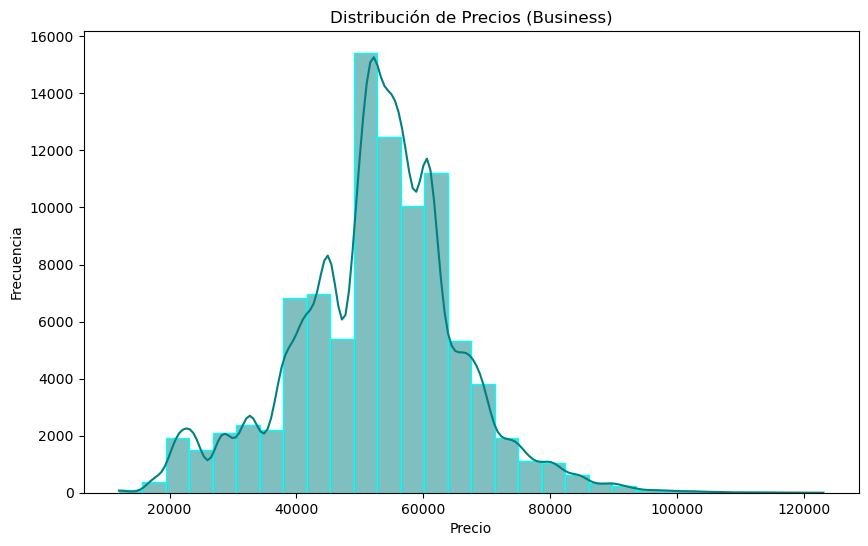

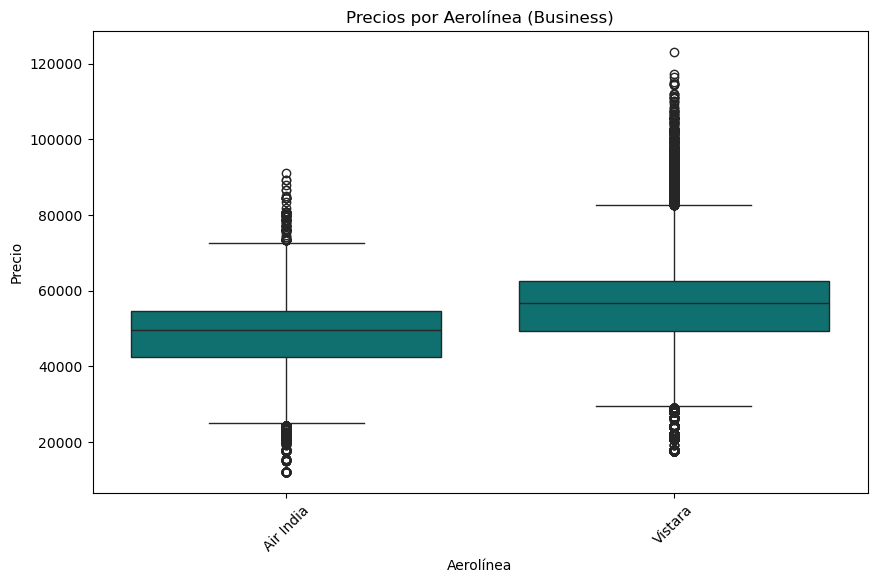

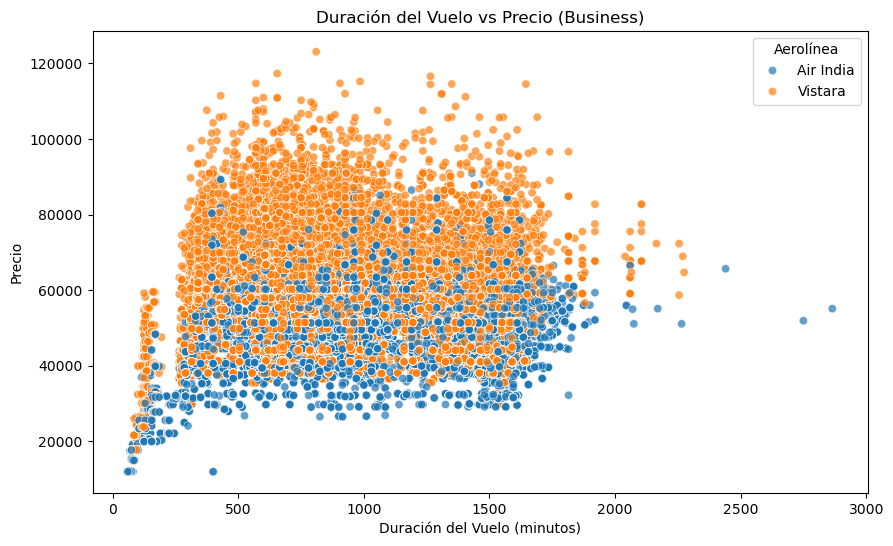

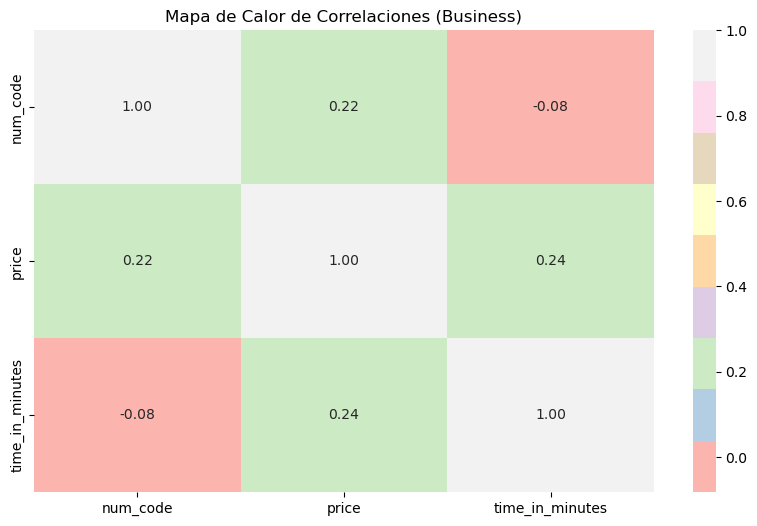

In [208]:
def generar_reporte_calidad_con_graficos(df, nombre_dataset):
    """
    Genera un reporte de calidad para el dataset, incluyendo:
    - Limpieza inicial de columnas clave (como 'price' y 'airline')
    - Información general
    - Valores nulos
    - Estadísticas básicas de las columnas numéricas
    - Nombres de las columnas
    - Detección de posibles outliers
    - Visualizaciones iniciales (Histogramas, Boxplots, Scatterplots, Heatmaps)
    """
    # Diccionario para almacenar el reporte
    reporte = {}
    print(f"\n--- Reporte de Calidad para {nombre_dataset} ---\n")
    
    # Limpieza inicial de la columna 'price'
    if 'price' in df.columns:
        try:
            # Convertir los precios a string para eliminar comas y luego a float
            df['price'] = df['price'].astype(str)
            df['price'] = df['price'].str.replace(",", "").astype(float)
        except Exception as e:
            print(f"Error al limpiar la columna 'price' {e}")
            return None
    
    # Limpieza inicial de la columna 'airline'
    if 'airline' in df.columns:
        try:
            # Eliminar espacios en blanco y rellenar valores nulos con 'Unknown'
            df['airline'] = df['airline'].str.strip()
            df['airline'] = df['airline'].fillna("Unknown")
        except Exception as e:
            print(f"Error al limpiar la columna `airline`: {e}")
            return None
    
    # Mostrar nombres de las columnas
    print("\nNombres de las Columnas:")
    columnas = df.columns.tolist()
    print(columnas)
    reporte['columnas'] = columnas
    
    # Mostrar valores únicos en la columna 'airline'
    if 'airline' in df.columns:
        print("\nValores únicos en la columna `airline`:")
        print(df['airline'].value_counts())
    
    # Información general del dataset
    print("\nInformación General:")
    reporte['info'] = df.info()
    
    # Calcular y mostrar los valores nulos
    valores_nulos = df.isnull().sum()
    reporte['valores_nulos'] = valores_nulos[valores_nulos > 0]
    print("\nValores Nulos:")
    print(reporte['valores_nulos'])
    
    # Estadísticas descriptivas
    print("\nEstadísticas Descriptivas:")
    reporte['estadisticas_descriptivas'] = df.describe(include='all')
    print(reporte['estadisticas_descriptivas'])
    
    # Generación de visualizaciones
    print("\nGenerando visualizaciones...\n")
    
    # Histograma de precios
    if 'price' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df['price'], bins=30, kde=True, color='teal', edgecolor='cyan')
        plt.title(f"Distribución de Precios ({nombre_dataset})")
        plt.xlabel("Precio")
        plt.ylabel("Frecuencia")
        plt.show()
    
    # Boxplot de precios por aerolínea
    if 'price' in df.columns and 'airline' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='airline', y='price', color='teal')
        plt.title(f"Precios por Aerolínea ({nombre_dataset})")
        plt.xlabel("Aerolínea")
        plt.ylabel("Precio")
        plt.xticks(rotation=45)
        plt.show()
    
    # Scatter plot de duración del vuelo vs precio
    if 'price' in df.columns and 'time_taken' in df.columns:
        try:
            # Convertir duración del vuelo a minutos
            df['time_in_minutes'] = df['time_taken'].str.extract(r'(\d+)h').astype(float) * 60 + \
                                    df['time_taken'].str.extract(r'(\d+)m').fillna(0).astype(float)
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x='time_in_minutes', y='price', hue='airline', alpha=0.7)
            plt.title(f"Duración del Vuelo vs Precio ({nombre_dataset})")
            plt.xlabel("Duración del Vuelo (minutos)")
            plt.ylabel("Precio")
            plt.legend(title='Aerolínea')
            plt.show()
        except Exception as e:
            print(f"Error al procesar `time_taken`: {e}")
    
    # Mapa de calor de correlaciones
    columnas_numericas = df.select_dtypes(include=['number'])  # Filtrar solo columnas numéricas
    if not columnas_numericas.empty:
        plt.figure(figsize=(10, 6))
        correlacion = columnas_numericas.corr()  # Calcular matriz de correlación
        sns.heatmap(correlacion, annot=True, cmap='Pastel1', fmt='.2f')
        plt.title(f"Mapa de Calor de Correlaciones ({nombre_dataset})")
        plt.show()
    
    # Retornar el reporte generado
    return reporte

# Generar el reporte de calidad con gráficos para ambos datasets
reporte_calidad_business = generar_reporte_calidad_con_graficos(business_data, "Business")


#### <span style="color:purple">Análisis del Dataset Business</span>

**A partir de los resultados y las visualizaciones generadas, podemos realizar un análisis del dataset Business.**

1. **Resumen general de los datos**
   
    - **Número de registros:** 93,487 filas.
    - **Columnas:** 11, incluyendo *date, airline, ch_code, num_code, dep_time, from, time_taken, stop, arr_time, to, price*. Columnas con información clave: *airline, time_taken, price y stop*.
    - **Aerolíneas presentes:**
        - *Vistara:* 60,589 registros (64.8% del total).
        - *Air India:* 32,898 registros (35.2% del total).
    - **Rango temporal:** Del 11 de febrero de 2022 al 31 de marzo de 2022.
    - **Tamaño en memoria:** 7.8 MB.
  
2. **Valores nulos**
   
    - **No hay valores nulos:** Todas las columnas tienen registros completos, lo que significa que no es necesario realizar imputaciones de datos en este caso.

3. **Estadísticas descriptivas**

    - **Columna price:**
        - *Rango de precios:*
            - Mínimo: 12,000.
            - Máximo: 123,071.
            - Media: 52,540.
            - Mediana (percentil 50): 53,164.

        - *Distribución:*
            - Hay valores atípicos por encima de 100,000, posiblemente vuelos exclusivos o errores.
            - La mayoría de los precios están concentrados entre 40,000 y 60,000.

    - **Columna time_taken:**
        - *Valores únicos:* 373.
        - *Distribución:*
            - La duración más común es 2 horas y 10 minutos (02h 10m).
            - Hay duraciones largas (más de 24 horas), probablemente vuelos con escalas múltiples.

    - **Columna stop:**
        - La mayoría de los vuelos son directos o con una escala (non-stop y 1-stop).
        - Hay inconsistencias en el formato, como valores que contienen espacios o caracteres innecesarios.

4. **Análisis de visualizaciones**

    - **Distribución de precios (Histograma):**
        - La distribución muestra una ligera asimetría hacia la derecha, indicando la presencia de vuelos más costosos como valores atípicos.
        - Los precios más comunes están alrededor de 50,000.

    - **Boxplot de precios por aerolínea:**
        - *Air India:*
            - Tiene una mediana de precio ligeramente más baja que Vistara.
            - Presenta un rango intercuartil (IQR) más estrecho, indicando menos variabilidad en precios.
        - *Vistara:* Muestra mayor dispersión en los precios, con varios valores atípicos por encima de 100,000.

    - **Scatter plot (Duración del vuelo vs. Precio):**
        - La relación entre la duración del vuelo y el precio no es lineal.
        - Los vuelos directos (duración corta) tienen precios que oscilan en un rango amplio.
        - Los vuelos más largos tienden a concentrarse en precios más altos, aunque hay excepciones.
      
    - **Mapa de calor de correlaciones:**
        - *price y time_in_minutes:* Correlación débil positiva (0.24). Sugiere que los vuelos más largos tienden a ser más caros, pero no de manera fuerte.
        - Otras variables (num_code): Correlación baja o insignificante.

5. **Observaciones clave**

     - *Relación entre duración y precio:* Aunque los vuelos más largos suelen ser más caros, hay suficiente dispersión para explorar otros factores como el número de escalas.

    - *Aerolíneas:* Vistara tiene mayor diversidad de precios, mientras que Air India parece mantener precios más consistentes.

    - *Outliers:* Los vuelos con precios superiores a 100,000 deberían revisarse para confirmar si son casos válidos o errores.

  
6. **Acciones recomendadas**

    - **Limpieza adicional:** Corregir los formatos inconsistentes en las columnas *time_taken y stop*.

    - **Análisis de outliers:** Investigar los vuelos con precios altos para determinar si deben ser excluidos o explicados.

    - **Incluir más variables:** Considerar el impacto de otros factores, como la fecha de reserva (date) o el horario de salida (dep_time).


--- Reporte de Calidad para Economy ---


Nombres de las Columnas:
['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price']

Valores únicos en la columna `airline`:
airline
Vistara      67270
Air India    47996
Indigo       43120
GO FIRST     23177
AirAsia      16098
SpiceJet      9011
StarAir         61
Trujet          41
Name: count, dtype: int64

Información General:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        206774 non-null  datetime64[ns]
 1   airline     206774 non-null  object        
 2   ch_code     206774 non-null  object        
 3   num_code    206774 non-null  int64         
 4   dep_time    206774 non-null  object        
 5   from        206774 non-null  object        
 6   time_taken  206774 non-null  object        
 7   stop        20

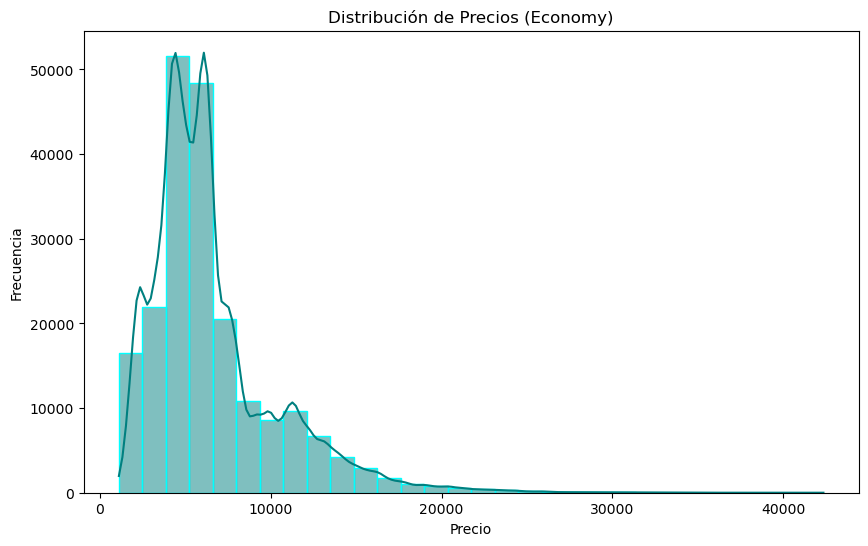

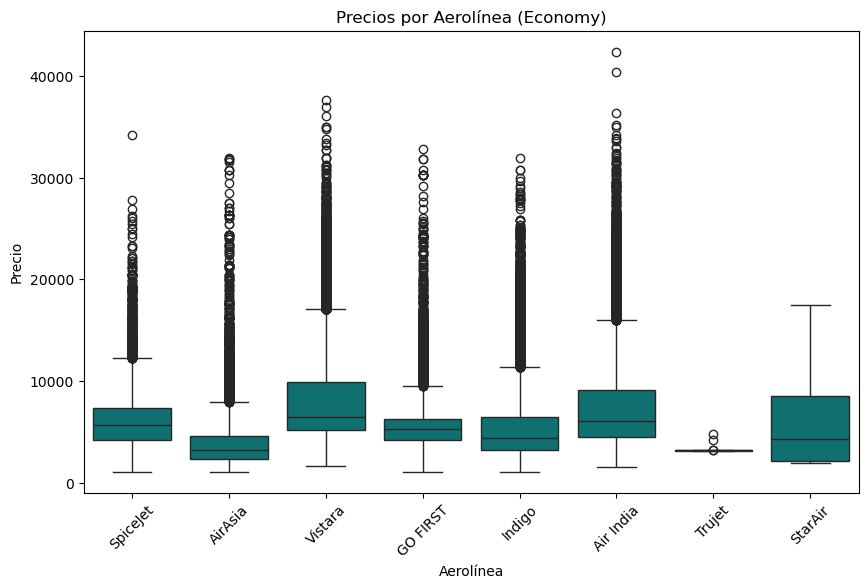

C:\Users\atapi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


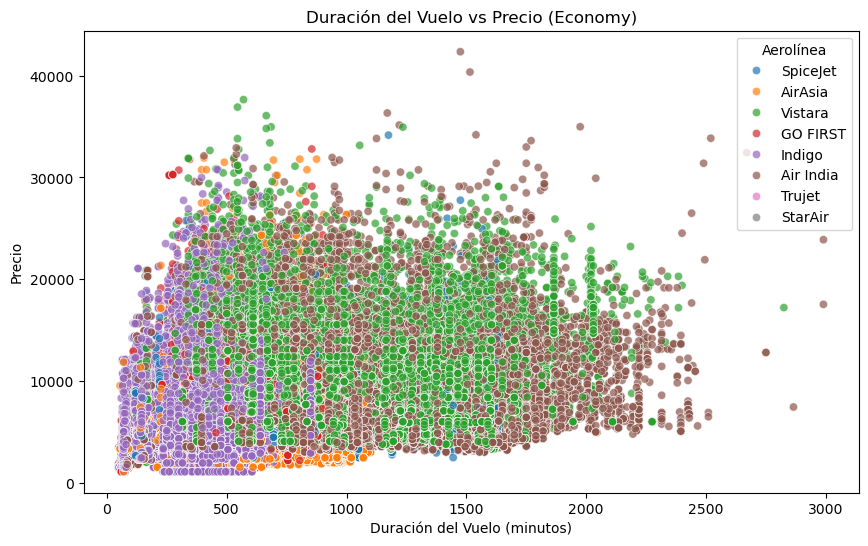

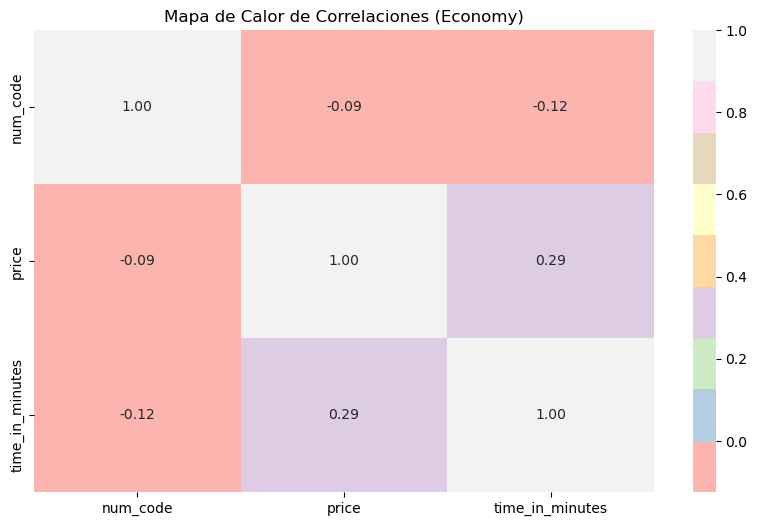

In [210]:
# Generar el reporte de calidad con gráficos para ambos datasets
reporte_calidad_economy = generar_reporte_calidad_con_graficos(economy_data, "Economy")


#### <span style="color:purple">Análisis del Dataset Economy</span>

1. **Resumen general de los datos**

    - **Tamaño del dataset:**
        - El dataset Economy contiene 206,774 registros distribuidos en 11 columnas.
        - No se encontraron valores nulos en las columnas.

    - **Columnas relevantes:**
        - *price:* Variable objetivo. Los precios oscilan entre 1105 y 42,349, con un promedio de 6,571 y una desviación estándar de 3,743.
        - *airline:* Contiene 8 aerolíneas con valores bien distribuidos. La aerolínea Vistara tiene la mayor frecuencia (67,270 vuelos), mientras que Trujet y StarAir tienen los menores números de registros.
        - *time_taken:* Duración del vuelo, que se analizará en detalle al ajustar la escala a minutos.

2. **Distribución de price (Histograma):**

    - La mayoría de los precios están concentrados entre los 2,000 y 10,000.
    - La distribución muestra una cola hacia la derecha, indicando la presencia de valores altos atípicos.

3. **Precios por aerolínea (Boxplot):**

    - Las aerolíneas como *Vistara, Indigo y Air India* muestran precios más altos en promedio.
    - Se observan valores atípicos significativos en todas las aerolíneas, particularmente en *Indigo y Air India*.

4. **Duración del vuelo vs. Precio (Scatter Plot):**

    - No se evidencia una relación lineal directa entre la duración y el precio.
    - Se observa que vuelos con mayores duraciones no necesariamente implican mayores precios.

5. **Mapa de calor de correlaciones:**

    - Las correlaciones entre las variables numéricas (price, num_code, time_in_minutes) son débiles:
        - *price* tiene una correlación de 0.29 con la duración del vuelo en minutos (time_in_minutes).
        - Correlaciones menores entre price y num_code.

6. **Ajustes necesarios**

    - Basado en este análisis, se sugieren los siguientes ajustes:
        - **Transformación de time_taken:** Convertir la columna time_taken en valores numéricos (en minutos) para facilitar análisis y modelado.
        - **Identificación y manejo de outliers:**
            - Revisar los valores atípicos detectados en la columna price.
            - Decidir si se eliminan o transforman según el contexto del negocio.
        - **Estandarización de variables categóricas:** Crear codificaciones como one-hot encoding para variables categóricas como airline.
        - **Creación de nuevas características:** Evaluar si la variable stop puede transformarse en una métrica numérica (número de paradas). Extraer información adicional de la columna *dep_time* o *arr_time*, como períodos del día (mañana, tarde, noche).

**<span style="color:blue">A contuniación se realizan dos funciones con los ajustes necesarios para cada resultado (Business y Economy) </span>**

In [213]:
def ajustar_business_data(df):
    """
    Realiza ajustes adicionales al dataset Business:
    - Corrige formatos inconsistentes en las columnas 'time_taken' y 'stop'.
    - Identifica y maneja outliers en la columna 'price'.
    - Crea nuevas variables basadas en 'date' y 'dep_time'.
    """
    # ----------------------
    # Corrección de formato en la columna 'time_taken'
    # ----------------------
    # Convertir la duración del vuelo de formato texto (e.g., "2h 30m") a minutos totales.
    df['time_in_minutes'] = (
        df['time_taken'].str.extract(r'(\d+)h').fillna(0).astype(int) * 60 +  # Extraer horas y convertir a minutos
        df['time_taken'].str.extract(r'(\d+)m').fillna(0).astype(int))        # Extraer minutos
    
    # ----------------------
    # Limpieza en la columna 'stop'
    # ----------------------
    # Limpiar espacios en blanco y eliminar textos innecesarios (como saltos de línea).
    # Convertir "non-stop" a "0 stops" y mantener el formato numérico de los valores.
    df['stop'] = df['stop'].str.strip().replace(
        {r'\n.*': '', 'non-stop': '0 stops'}, regex=True)
    
    # Extraer el número de escalas (stop) como variable numérica.
    df['stop_numeric'] = df['stop'].str.extract(r'(\d+)').fillna(0).astype(int)

    # ----------------------
    # Identificación de outliers en la columna 'price'
    # ----------------------
    # Calcular el rango intercuartílico (IQR) para identificar valores atípicos.
    Q1 = df['price'].quantile(0.25)  # Primer cuartil (percentil 25)
    Q3 = df['price'].quantile(0.75)  # Tercer cuartil (percentil 75)
    IQR = Q3 - Q1                    # Rango intercuartílico (IQR)
    outlier_threshold_low = Q1 - 1.5 * IQR  # Límite inferior
    outlier_threshold_high = Q3 + 1.5 * IQR  # Límite superior

    # Crear una columna booleana que indique si un vuelo es un outlier en el precio.
    df['is_outlier'] = (
        (df['price'] < outlier_threshold_low) | 
        (df['price'] > outlier_threshold_high))
    # Imprimir el número de outliers identificados
    print(f"Vuelos identificados como outliers: {df['is_outlier'].sum()}")

    # ----------------------
    # Creación de nuevas variables basadas en la fecha y el horario de salida
    # ----------------------
    # Crear una columna para el día de la semana basado en la columna 'date'.
    df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()

    # Crear una columna para la hora de salida basado en la columna 'dep_time'.
    df['departure_hour'] = pd.to_datetime(df['dep_time'], format='%H:%M:%S').dt.hour

    # ----------------------
    # Agrupar horarios de salida en franjas horarias
    # ----------------------
    # Crear grupos de tiempo: Madrugada, Mañana, Tarde, Noche.
    bins = [0, 6, 12, 18, 24]  # Límites de las franjas horarias.
    labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']  # Nombres de las franjas horarias.
    df['departure_period'] = pd.cut(df['departure_hour'], bins=bins, labels=labels, right=False)

    # ----------------------
    # Codificación one-hot para variables categóricas
    # ----------------------
    # Aplicar codificación one-hot en las columnas 'day_of_week' y 'departure_period'.
    # Se descarta la primera categoría para evitar colinealidad (drop_first=True).
    df = pd.get_dummies(df, columns=['day_of_week', 'departure_period'], drop_first=True)
    
    # Retornar el dataset ajustado
    return df

# Aplicar los ajustes al dataset Business
business_data_ajustado = ajustar_business_data(business_data)

# ----------------------
# Mostrar un resumen de los datos ajustados
# ----------------------
# Mostrar las primeras 15 filas del dataset ajustado para ver los cambios realizados.
print("\nResumen de datos ajustados (Business):")
business_data_ajustado.head(15)



Vuelos identificados como outliers: 3650

Resumen de datos ajustados (Business):


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,...,departure_hour,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,departure_period_Mañana,departure_period_Tarde,departure_period_Noche
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,0 stops,20:00:00,Mumbai,...,18,False,False,False,False,False,False,False,False,True
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,0 stops,21:15:00,Mumbai,...,19,False,False,False,False,False,False,False,False,True
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop,20:45:00,Mumbai,...,20,False,False,False,False,False,False,False,False,True
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop,23:55:00,Mumbai,...,21,False,False,False,False,False,False,False,False,True
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop,23:55:00,Mumbai,...,17,False,False,False,False,False,False,False,True,False
5,2022-02-11,Vistara,UK,985,19:50:00,Delhi,02h 10m,0 stops,22:00:00,Mumbai,...,19,False,False,False,False,False,False,False,False,True
6,2022-02-11,Air India,AI,479,21:15:00,Delhi,17h 45m,1-stop,15:00:00,Mumbai,...,21,False,False,False,False,False,False,False,False,True
7,2022-02-11,Air India,AI,473,18:40:00,Delhi,22h 45m,1-stop,17:25:00,Mumbai,...,18,False,False,False,False,False,False,False,False,True
8,2022-02-11,Vistara,UK,871,20:35:00,Delhi,17h 55m,1-stop,14:30:00,Mumbai,...,20,False,False,False,False,False,False,False,False,True
9,2022-02-11,Vistara,UK,977,19:00:00,Delhi,02h 15m,0 stops,21:15:00,Mumbai,...,19,False,False,False,False,False,False,False,False,True


**<span style="color:purple">Análisis del Resultado - Business</span>**

- **Outliers detectados:** El mensaje "Vuelos identificados como outliers: 3650" indica que, según el rango intercuartílico (IQR), se detectaron 3,650 vuelos como valores atípicos en la columna price. Esto es razonable si el dataset contiene precios extremos fuera del rango esperado.

- **Nuevas columnas creadas:**
    - *time_in_minutes:* La columna convierte la duración del vuelo (time_taken) de formato textual a minutos totales. Ejemplo: 02h 10m -> 130.
    - *stop_numeric:* La columna convierte los valores de escalas en stop a un formato numérico. Ejemplo: 1-stop -> 1, 0 stops -> 0.
    - *day_of_week:* Extrae el día de la semana de la columna date. Ejemplo: 2022-02-11 -> Friday.
    - *departure_hour:* Extrae la hora del horario de salida (dep_time). Ejemplo: 18:00:00 -> 18.
    - *departure_period:* Agrupa las horas del día en franjas horarias como Madrugada, Mañana, Tarde, Noche.

- **Codificación one-hot:** Se crearon columnas binarias para las categorías de day_of_week y departure_period. Ejemplo:
    - *day_of_week_Monday:* True si el vuelo fue un lunes; de lo contrario, False.
    - *departure_period_Tarde:¨* True si el vuelo fue en la tarde; de lo contrario, False.

**Resumen del dataset ajustado: El resumen muestra las primeras 15 filas del dataset ajustado, con las columnas adicionales y las transformaciones aplicadas correctamente.**

In [215]:
def ajustar_datos_economy(df):
    """
    Realiza ajustes en el dataset Economy:
    - Convierte 'time_taken' a minutos.
    - Identifica y maneja outliers en la columna 'price'.
    - Aplica codificación one-hot a variables categóricas.
    - Crea nuevas características basadas en las columnas 'stop', 'dep_time' y 'arr_time'.
    """

    # 1. Convertir 'time_taken' a minutos
    try:
        # Extraer las horas y minutos de la columna 'time_taken', convertirlas a enteros y calcular el total en minutos
        df['time_in_minutes'] = (
            df['time_taken']
            .str.extract(r"(\d+)h").fillna(0).astype(int) * 60 +  # Convertir las horas a minutos
            df['time_taken']
            .str.extract(r"(\d+)m").fillna(0).astype(int))         # Agregar los minutos
        
    except Exception as e:
        print(f"Error al convertir 'time_taken' a minutos: {e}")

    # 2. Identificar y manejar outliers en 'price'
    # Calcular el rango intercuartílico (IQR) y los límites para identificar outliers
    Q1 = df['price'].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df['price'].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1                    # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR     # Límite inferior
    upper_bound = Q3 + 1.5 * IQR     # Límite superior

    # Crear una columna para marcar los outliers
    df['is_outlier'] = (df['price'] < lower_bound) | (df['price'] > upper_bound)
    
    print(f"Outliers detectados en `price`: {df['is_outlier'].sum()}")  # Mostrar el número de outliers detectados
    

    # 3. Codificación one-hot de 'airline'
    # Convertir la columna 'airline' en varias columnas binarias (una para cada aerolínea)
    df = pd.get_dummies(df, columns=['airline'], prefix='airline')

    # 4. Transformar 'stop' en una métrica numérica
    # Convertir el texto de la columna 'stop' en el número de paradas
    df['num_stops'] = df['stop'].apply(lambda x: 0 if 'non-stop' in x else len(x.split(' ')))

    # 5. Extraer períodos del día de 'dep_time' y 'arr_time'
    # Función para asignar un período del día (mañana, tarde, noche, madrugada) según la hora
    def obtener_periodo(tiempo):
        if isinstance(tiempo, str):  # Si el tiempo está en formato de texto
            hora = int(tiempo.split(':')[0])
        elif isinstance(tiempo, pd.Timestamp) or isinstance(tiempo, datetime.time):  # Si es un objeto de tiempo
            hora = tiempo.hour
        else:
            raise ValueError(f"Formato no soportado para tiempo: {tiempo}")

        # Determinar el período del día
        if 5 <= hora < 12:
            return 'Mañana'
        elif 12 <= hora < 18:
            return 'Tarde'
        elif 18 <= hora < 23:
            return 'Noche'
        else:
            return 'Madrugada'

    # Aplicar la función 'obtener_periodo' a las columnas 'dep_time' y 'arr_time'
    df['dep_period'] = df['dep_time'].apply(obtener_periodo)
    df['arr_period'] = df['arr_time'].apply(obtener_periodo)

    # Codificación one-hot para los períodos del día
    df = pd.get_dummies(df, columns=['dep_period', 'arr_period'], prefix=['dep', 'arr'])

    return df  # Devolver el DataFrame ajustado

# Aplicar ajustes al dataset Economy
adjusted_economy_data = ajustar_datos_economy(economy_data)

# Vista previa del dataset ajustado
adjusted_economy_data.head(15)


Outliers detectados en `price`: 13750


,date,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,...,airline_Vistara,num_stops,dep_Madrugada,dep_Mañana,dep_Noche,dep_Tarde,arr_Madrugada,arr_Mañana,arr_Noche,arr_Tarde
0,2022-02-11,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953.0,...,False,0,False,False,True,False,False,False,True,False
1,2022-02-11,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953.0,...,False,0,False,True,False,False,False,True,False,False
2,2022-02-11,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956.0,...,False,0,True,False,False,False,False,True,False,False
3,2022-02-11,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955.0,...,True,0,False,True,False,False,False,False,False,True
4,2022-02-11,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955.0,...,True,0,False,True,False,False,False,True,False,False
5,2022-02-11,UK,945,11:40:00,Delhi,02h 20m,non-stop,14:00:00,Mumbai,5955.0,...,True,0,False,True,False,False,False,False,False,True
6,2022-02-11,UK,927,09:30:00,Delhi,02h 05m,non-stop,11:35:00,Mumbai,6060.0,...,True,0,False,True,False,False,False,True,False,False
7,2022-02-11,UK,951,14:20:00,Delhi,02h 10m,non-stop,16:30:00,Mumbai,6060.0,...,True,0,False,False,False,True,False,False,False,True
8,2022-02-11,G8,334,08:00:00,Delhi,02h 10m,non-stop,10:10:00,Mumbai,5954.0,...,False,0,False,True,False,False,False,True,False,False
9,2022-02-11,G8,336,14:20:00,Delhi,02h 15m,non-stop,16:35:00,Mumbai,5954.0,...,False,0,False,False,False,True,False,False,False,True


**<span style="color:purple">Explicación de las columnas en el dataset ajustado - Economy</span>**

- **Columnas originales:** date, ch_code, num_code, dep_time, from, time_taken, stop, arr_time, to, price: Estas columnas provienen del dataset original. 
- **Nuevas columnas generadas:**
    - *time_in_minutes:* Conversión de la duración del vuelo (time_taken) de formato texto a minutos. Ejemplo: "02h 10m" → 130 minutos.
    - *is_outlier:* Marca los vuelos cuyo precio se considera un outlier basado en los límites definidos (IQR). True para outliers, False para valores dentro del rango.
    - *num_stops:* Número de paradas calculado a partir de la columna stop. Ejemplo: "non-stop" → 0, "1 stop" → 1.
    - *dep_period* y *arr_period:* Períodos del día extraídos de dep_time y arr_time. Ejemplo: "18:55:00" → Noche, "06:20:00" → Mañana.

- **Codificación one-hot:**
    - Se han creado columnas adicionales para representar variables categóricas en formato binario.
    - *airline_Vistara:* Indica si la aerolínea es Vistara (True o False).
    - *dep_Mañana, dep_Noche, etc.:* Indica el período del día de la salida.
    - *arr_Mañana, arr_Noche, etc.:* Indica el período del día de la llegada.

---

**<span style="color:purple">Análisis del resultado - Economy</span>**

- **Outliers detectados:** El código detectó 13,750 outliers en la columna price. Estos valores se marcan en la columna *is_outlier* para su posterior análisis.
  
- **Transformación de tiempo:** La columna *time_taken* fue transformada correctamente a minutos y almacenada en *time_in_minutes*.

- **Codificación y nuevas variables:** La codificación one-hot y las nuevas variables (num_stops, dep_period, arr_period) se generaron correctamente, añadiendo información útil para el análisis.

- **Validación del resultado:** El dataset ahora contiene 29 columnas, lo cual es consistente con las nuevas variables y la codificación realizada.

---
---

## <span style="color:orange">Análisis exploratorio</span>

**Plan para realizar el análisis exploratorio**

- **Pipeline de Preparación de Datos para Análisis Exploratorio:**

    - Limpieza básica (lo cual ya está en parte realizado).
    - Transformaciones requeridas (como codificación y creación de nuevas variables).
    - Separación en datos univariados y bivariados.

- **Análisis Univariado:**

    - Visualización de la distribución de las variables relevantes.
    - Identificación de tendencias generales y posibles outliers.

- **Análisis Bivariado:**

    - Relación entre variables categóricas y numéricas (ej., boxplots).
    - Relación entre variables numéricas (ej., scatterplots, mapas de calor).



=== Inicio del Análisis Exploratorio ===

--- Análisis Univariado ---


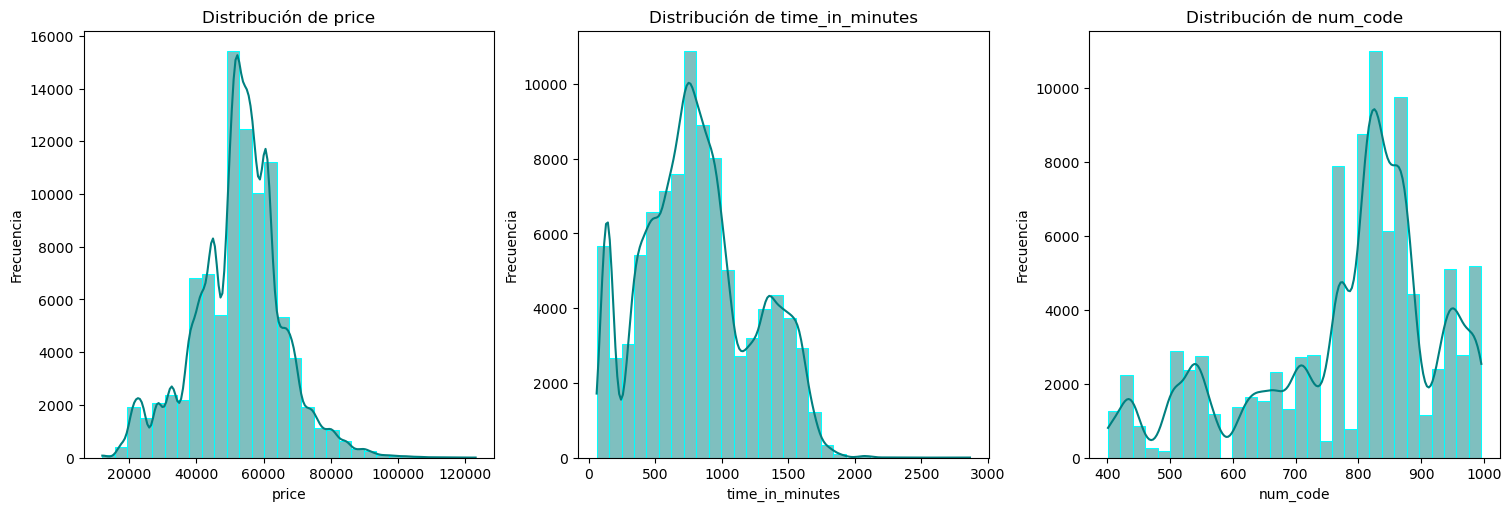

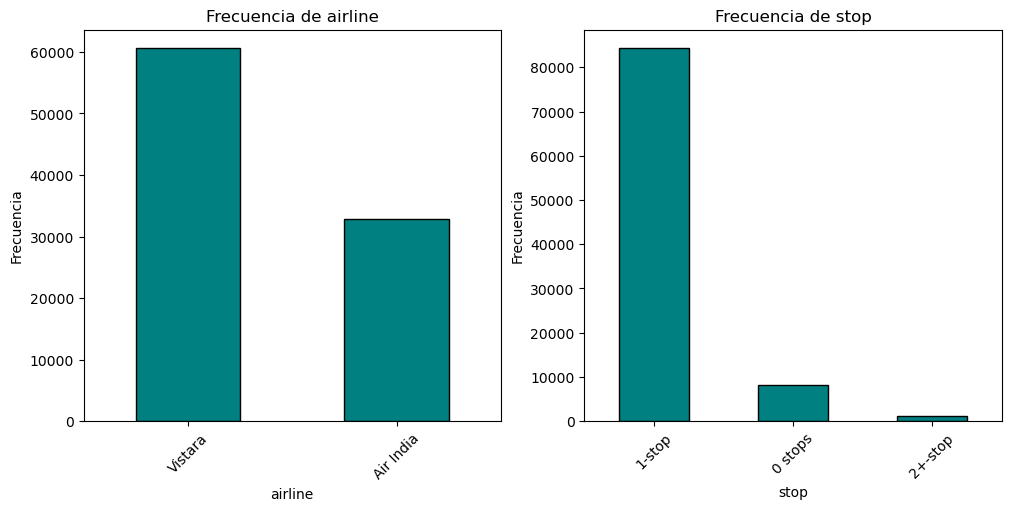


--- Análisis Bivariado ---


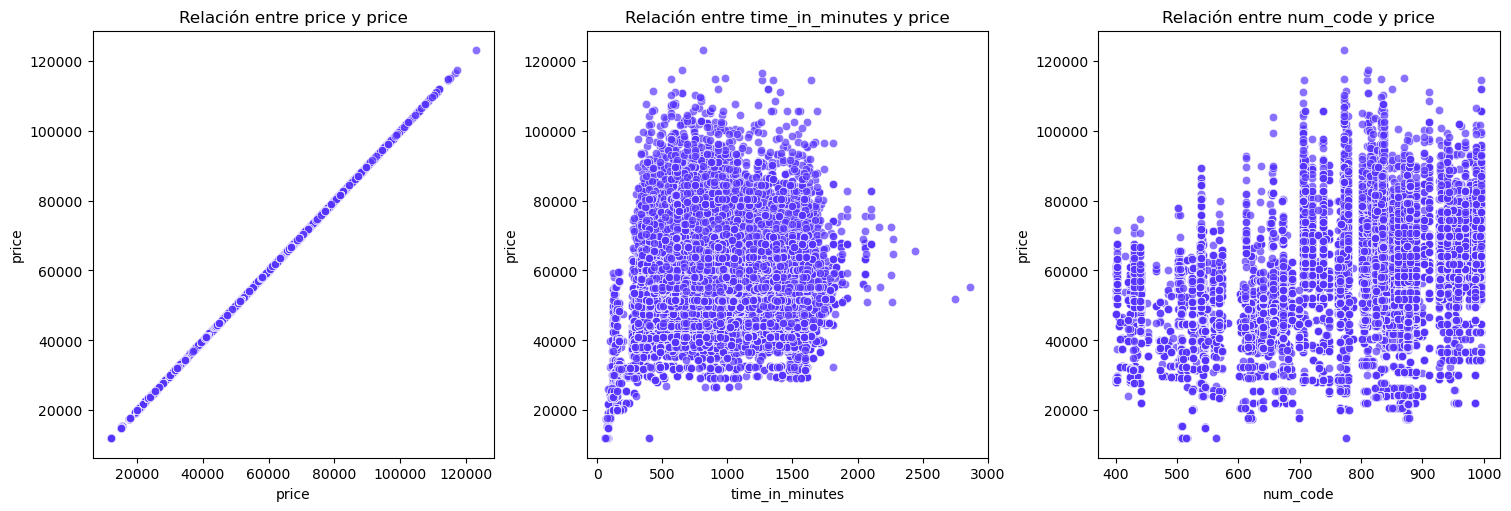

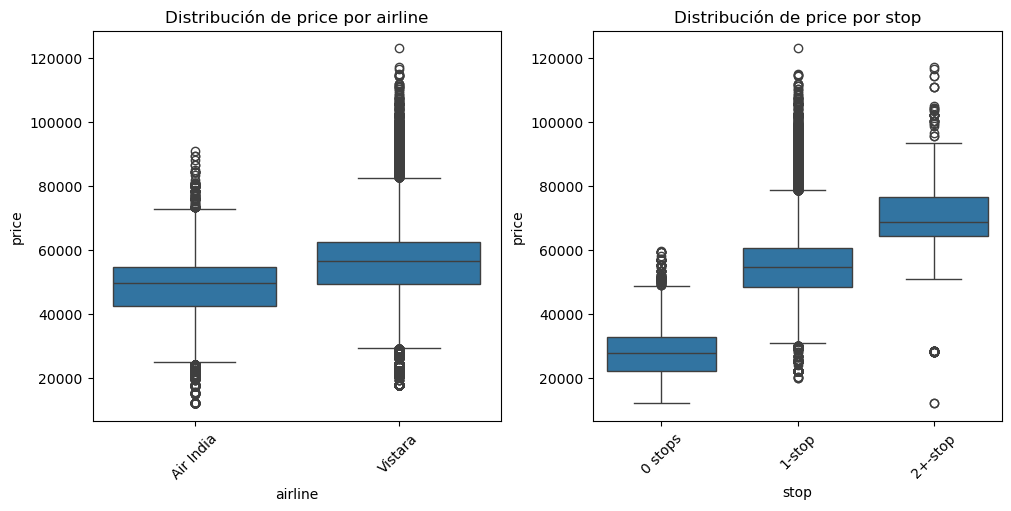

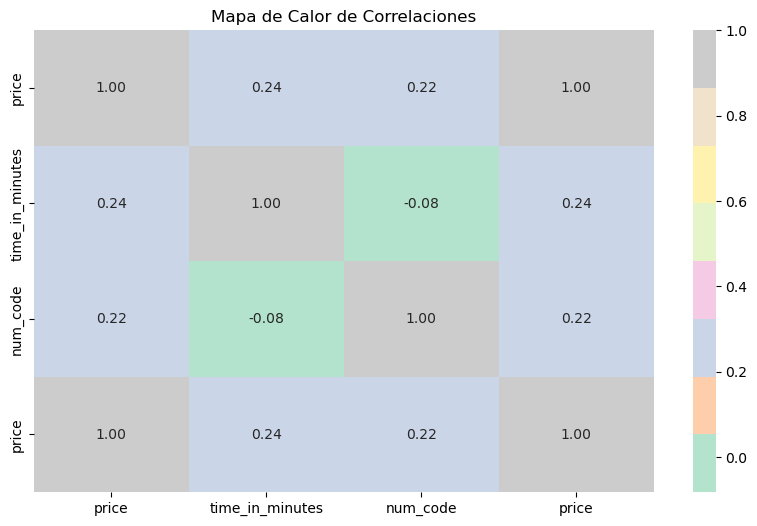


=== Fin del Análisis Exploratorio ===


In [217]:
# ----------------------
# Función para el análisis univariado
# ----------------------
def analisis_univariado(df, columnas_numericas, columnas_categoricas):
    """
    Realiza un análisis univariado para columnas numéricas y categóricas.
    Genera histogramas para variables numéricas y gráficos de barras para variables categóricas.

    Parámetros:
        df (DataFrame): El dataset que se analizará.
        columnas_numericas (list): Lista de nombres de columnas numéricas.
        columnas_categoricas (list): Lista de nombres de columnas categóricas.
    """
    print("\n--- Análisis Univariado ---")

    # Análisis de variables numéricas
    num_cols = len(columnas_numericas)
    fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5), constrained_layout=True)
    for i, col in enumerate(columnas_numericas):
        sns.histplot(df[col], kde=True, bins=30, color="teal", edgecolor="cyan", ax=axes[i])
        axes[i].set_title(f"Distribución de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
    plt.show()

    # Análisis de variables categóricas
    cat_cols = len(columnas_categoricas)
    fig, axes = plt.subplots(1, cat_cols, figsize=(5 * cat_cols, 5), constrained_layout=True)
    for i, col in enumerate(columnas_categoricas):
        df[col].value_counts().plot(kind="bar", color="teal", edgecolor="black", ax=axes[i])
        axes[i].set_title(f"Frecuencia de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis='x', rotation=45)
    plt.show()

# ----------------------
# Función para el análisis bivariado
# ----------------------
def analisis_bivariado(df, columnas_numericas, columna_objetivo, columnas_categoricas):
    """
    Realiza un análisis bivariado entre columnas numéricas/categóricas y la columna objetivo.
    Genera scatterplots, boxplots y un mapa de calor de correlaciones según corresponda.

    Parámetros:
        df (DataFrame): El dataset que se analizará.
        columnas_numericas (list): Lista de nombres de columnas numéricas.
        columna_objetivo (str): Nombre de la columna objetivo.
        columnas_categoricas (list): Lista de nombres de columnas categóricas.
    """
    print("\n--- Análisis Bivariado ---")

    # Relación entre variables numéricas y la columna objetivo
    num_cols = len(columnas_numericas)
    fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5), constrained_layout=True)
    for i, col in enumerate(columnas_numericas):
        sns.scatterplot(data=df, x=col, y=columna_objetivo, alpha=0.7, color="#5733FF", ax=axes[i])
        axes[i].set_title(f"Relación entre {col} y {columna_objetivo}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(columna_objetivo)
    plt.show()

    # Relación entre variables categóricas y la columna objetivo
    cat_cols = len(columnas_categoricas)
    fig, axes = plt.subplots(1, cat_cols, figsize=(5 * cat_cols, 5), constrained_layout=True)
    for i, col in enumerate(columnas_categoricas):
        sns.boxplot(data=df, x=col, y=columna_objetivo, ax=axes[i])
        axes[i].set_title(f"Distribución de {columna_objetivo} por {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(columna_objetivo)
        axes[i].tick_params(axis='x', rotation=45)
    plt.show()

    # Mapa de calor para visualizar las correlaciones entre variables numéricas
    plt.figure(figsize=(10, 6))
    correlacion = df[columnas_numericas + [columna_objetivo]].corr()  # Calcular matriz de correlación
    sns.heatmap(correlacion, annot=True, cmap="Pastel2", fmt=".2f")  # Crear mapa de calor
    plt.title("Mapa de Calor de Correlaciones")  # Título del gráfico
    plt.show()

# Pipeline para análisis exploratorio
def pipeline_analisis_exploratorio(df, columnas_numericas, columnas_categoricas, columna_objetivo):
    """
    Combina las funciones de análisis univariado y bivariado en un solo flujo para ejecutar ambos análisis secuencialmente.

    Parámetros:
        df (DataFrame): El dataset que se analizará.
        columnas_numericas (list): Lista de nombres de columnas numéricas.
        columnas_categoricas (list): Lista de nombres de columnas categóricas.
        columna_objetivo (str): Nombre de la columna objetivo.
    """
    print("\n=== Inicio del Análisis Exploratorio ===")
    
    # Ejecutar análisis univariado
    analisis_univariado(df, columnas_numericas, columnas_categoricas)
    
    # Ejecutar análisis bivariado
    analisis_bivariado(df, columnas_numericas, columna_objetivo, columnas_categoricas)
    
    print("\n=== Fin del Análisis Exploratorio ===")

# Definir columnas
columnas_numericas = ["price", "time_in_minutes", "num_code"]  # Columnas con datos numéricos
columnas_categoricas = ["airline", "stop"]  # Columnas con datos categóricos
columna_objetivo = "price"  # Columna objetivo para el análisis bivariado

# Ejecutar el pipeline de análisis exploratorio
pipeline_analisis_exploratorio(business_data, columnas_numericas, columnas_categoricas, columna_objetivo)


#### <span style="color:purple">Análisis Univariado</span>

1. **Variables Numéricas**

    - **Distribución de price:** La variable *price* muestra una distribución con una fuerte asimetría positiva (cola larga hacia la derecha). Esto indica que la mayoría de los precios se concentran en valores bajos, con algunos valores atípicos en rangos más altos.
        - *Implicación:* Los valores extremos pueden distorsionar el análisis y deben investigarse como posibles outliers o vuelos premium.

    - **Distribución de time_in_minutes:** *time_in_minutes* también presenta una asimetría positiva. La mayoría de los vuelos tienen duraciones relativamente cortas, mientras que unos pocos vuelos presentan tiempos muy largos.
        - *Implicación:* Estos tiempos largos pueden corresponder a vuelos internacionales o conexiones con múltiples escalas.

    - **Distribución de num_code:** *num_code* muestra una distribución discreta con picos bien definidos. Podría tratarse de categorías asignadas a vuelos por tipo, región o clase.
        - *Implicación:* Se necesita más contexto para interpretar esta variable, pero podría ser útil para segmentar los datos.


2. **Variables Categóricas**

    - **airline:** La mayoría de los vuelos están operados por *Vistara* y *Air India*. *Vistara* domina el conjunto de datos, lo que indica que las conclusiones podrían estar sesgadas hacia estas aerolíneas.
        - *Implicación:* Sería útil balancear los datos si se desea analizar de manera equitativa todas las aerolíneas.

    - **stop:** La categoría 1-stop tiene la mayor frecuencia, seguida por 0 stops y 2+ stops. Esto sugiere que los vuelos con una escala son los más comunes.
        - *Implicación:* Esto refleja posibles preferencias de los viajeros o disponibilidad operativa en las rutas analizadas.

---

#### <span style="color:purple">Análisis Bivariado</span>

1. **Relación entre Variables Numéricas y price**

    - **price vs. time_in_minutes:** Se observa una correlación positiva débil (coeficiente 0.24). Esto indica que, aunque los precios tienden a aumentar con la duración del vuelo, esta relación no es muy fuerte.
        - *Implicación:* Otros factores, como la aerolínea o el número de escalas, pueden influir más significativamente en el precio.

    - **price vs. num_code:** La dispersión y agrupaciones en el gráfico sugieren que *num_code* podría estar relacionado con categorías específicas que afectan el precio (como clase de cabina o destino).
        - *Implicación:* Investigar la semántica detrás de num_code podría revelar patrones adicionales.


2. **Relación entre Variables Categóricas y price**

    - **price por airline:** Los boxplots muestran que *Vistara* tiene una tendencia a precios ligeramente más altos que *Air India*, aunque ambas aerolíneas tienen un rango de precios similar.
        - *Implicación:* Esto podría reflejar diferencias en calidad del servicio o rutas atendidas.

    - **price por stop:** Los precios aumentan significativamente con el número de escalas. Los vuelos con 2+ stops tienen los precios más altos, lo que sugiere que estos vuelos son más costosos debido a itinerarios más largos o menos eficientes.
        - *Implicación:* Los viajeros probablemente valoren la comodidad de vuelos con menos escalas, reflejándose en un menor costo promedio para vuelos directos.

3. **Correlación Numérica**

    - El mapa de calor indica que price tiene una correlación moderada con time_in_minutes (0.24) y una correlación muy baja con num_code (0.22).
        - *Implicación:* Aunque existen relaciones, las correlaciones no son lo suficientemente fuertes como para concluir que estas variables explican completamente la variabilidad en *price*.

---

**<span style="color:olive">Conclusiones Generales</span>**

- **Factores que afectan el precio:**

    - Número de escalas (stop) es el factor más significativo: los precios aumentan con más escalas.
    - Aerolínea (airline): Vistara muestra precios más altos en promedio que Air India.
    - Duración del vuelo (time_in_minutes) tiene una influencia moderada, aunque otros factores parecen jugar un rol más importante.

- **Distribuciones desbalanceadas:** La predominancia de vuelos de Vistara y 1-stop podría sesgar el análisis si no se balancean los datos.

- **Valores extremos:** Las colas largas en las distribuciones de price y time_in_minutes indican la presencia de outliers que deben analizarse a fondo.

---

**<span style="color:olive">Recomendaciones</span>**

1. **Balancear el dataset:** Si el objetivo es comparar aerolíneas de manera equitativa, considerar tener una cantidad similar de datos para cada una. 

2. **Investigación adicional de outliers:** Analizar vuelos con precios y tiempos extremadamente altos para determinar si son errores, valores atípicos reales o representan un segmento premium.

3. **Análisis segmentado:** Explorar precios por rutas específicas o clases de cabina, especialmente si *num_code* está relacionado con estas características.

4. **Optimización de precios:** Si el análisis está orientado a estrategias de precio, enfocar más en la relación entre escalas y duración con precios, y posiblemente incorporar datos externos como demanda o fechas.

---
---

## <span style="color:orange">Análisis de Correlaciones y Selección de Variables Importantes</span>

El objetivo es realizar un análisis de correlaciones para identificar las variables más importantes para predecir la variable objetivo (**price**), tomando en cuenta las observaciones y recomendaciones anteriores.

**Pasos**

- **Preprocesamiento:**

    - Verificar y tratar outliers en las variables *price* y *time_in_minutes*.
    - Normalizar o escalar variables numéricas si es necesario.
    - Convertir variables categóricas (airline, stop) en variables numéricas (codificación, por ejemplo, one-hot encoding o label encoding).

- **Análisis de Correlaciones:**

    - Usar la matriz de correlación para evaluar la relación entre variables numéricas.
    - Evaluar la importancia de variables categóricas mediante técnicas estadísticas o gráficas.

- **Selección de Variables:**

    - Aplicar técnicas de selección de características como:
        - Matriz de correlación y mapa de calor.
        - Feature Importance utilizando modelos basados en árboles (Random Forest, Gradient Boosting).
        - Análisis de contribución mediante técnicas vistas en el curso.



=== Inicio del Análisis de Correlaciones ===

--- Preprocesamiento ---
Advertencia: Las siguientes columnas no son numéricas y serán excluidas: ['date', 'is_outlier']
Dataset procesado con 90829 filas y 15 columnas.

--- Análisis de Correlaciones ---


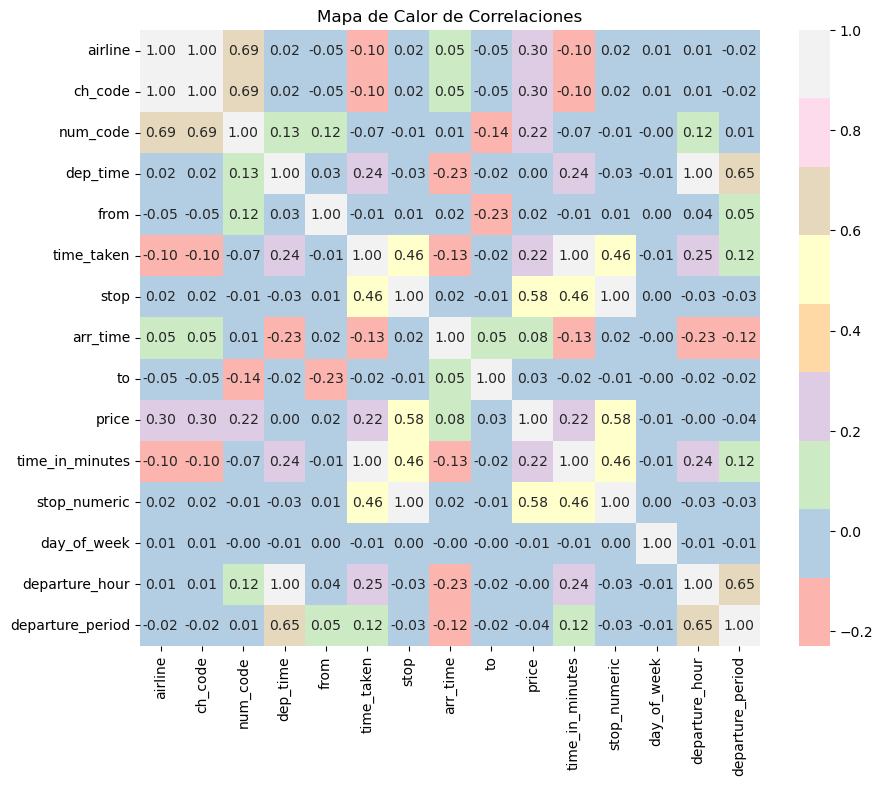


Correlaciones con la variable objetivo:
price               1.000000
stop                0.583412
stop_numeric        0.583412
airline             0.302143
ch_code             0.302143
num_code            0.224956
time_in_minutes     0.224166
time_taken          0.219316
arr_time            0.081782
to                  0.032986
from                0.022286
dep_time            0.002870
departure_hour     -0.001897
day_of_week        -0.008281
departure_period   -0.040015
Name: price, dtype: float64

=== Fin del Análisis de Correlaciones ===


In [219]:
# Preprocesamiento del Dataset
def preprocesamiento_dataset(df, columna_objetivo):
    """
    Preprocesa el dataset para análisis de correlaciones.
    - Escala variables numéricas.
    - Codifica variables categóricas.
    - Identifica y remueve outliers.

    Parámetros:
        df (DataFrame): Dataset a procesar.
        columna_objetivo (str): Variable objetivo (y).
    
    Retorna:
        DataFrame procesado.
    """
    print("\n--- Preprocesamiento ---")

    # Crear una copia del DataFrame original para evitar modificar los datos originales
    df = df.copy()

    # Manejo de outliers en las columnas de interés (variable objetivo y tiempos de vuelo)
    # Calcula los valores en los percentiles 1% y 99% para detectar outliers extremos
    limites_price = df[columna_objetivo].quantile([0.01, 0.99])
    limites_time = df['time_in_minutes'].quantile([0.01, 0.99])

    # Filtra el DataFrame para conservar solo los valores dentro de los límites calculados
    df = df.loc[
        (df[columna_objetivo] >= limites_price.iloc[0]) & (df[columna_objetivo] <= limites_price.iloc[1]) &
        (df['time_in_minutes'] >= limites_time.iloc[0]) & (df['time_in_minutes'] <= limites_time.iloc[1])].copy()

    # Escalado de variables numéricas
    # Identifica las columnas numéricas del DataFrame
    scaler = StandardScaler()
    variables_numericas = df.select_dtypes(include=[np.number]).columns

    # Escala las variables numéricas para normalizarlas (media = 0, desviación estándar = 1)
    df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

    # Codificación de variables categóricas
    # Identifica las columnas categóricas o de tipo object
    variables_categoricas = df.select_dtypes(include=['object', 'category']).columns
    for col in variables_categoricas:
        df[col] = df[col].astype('object')  # Asegura que la columna sea de tipo object
        df[col] = df[col].fillna("Desconocido")  # Rellena valores nulos con "Desconocido"
        df[col] = df[col].astype("category").cat.codes  # Convierte las categorías a valores numéricos

    # Verifica si quedan columnas no numéricas después del procesamiento
    no_numericas = df.select_dtypes(exclude=[np.number]).columns
    if not no_numericas.empty:
        print(f"Advertencia: Las siguientes columnas no son numéricas y serán excluidas: {no_numericas.tolist()}")
        # Elimina columnas no numéricas que no se pudieron procesar
        df = df.drop(columns=no_numericas)

    # Muestra el número de filas y columnas del DataFrame procesado
    print(f"Dataset procesado con {df.shape[0]} filas y {df.shape[1]} columnas.")
    return df

# Análisis de Correlaciones
def analisis_correlaciones(df, columna_objetivo):
    """
    Realiza el análisis de correlaciones entre las variables.
    - Genera un mapa de calor.
    - Destaca las correlaciones con la variable objetivo.

    Parámetros:
        df (DataFrame): Dataset procesado.
        columna_objetivo (str): Variable objetivo (y).
    """
    print("\n--- Análisis de Correlaciones ---")

    # Calcula la matriz de correlaciones entre todas las variables numéricas
    correlacion = df.corr()

    # Genera un mapa de calor para visualizar la matriz de correlaciones
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="Pastel1")
    plt.title("Mapa de Calor de Correlaciones")
    plt.show()

    # Selecciona y muestra las correlaciones con la variable objetivo
    correlaciones_objetivo = correlacion[columna_objetivo].sort_values(ascending=False)
    print("\nCorrelaciones con la variable objetivo:")
    print(correlaciones_objetivo)

# Pipeline de Análisis
def pipeline_analisis_correlaciones(df, columna_objetivo):
    """
    Ejecuta el análisis de correlaciones y selección de características.
    """
    print("\n=== Inicio del Análisis de Correlaciones ===")

    # Preprocesa el dataset y lo almacena en una nueva variable
    df_procesado = preprocesamiento_dataset(df, columna_objetivo)

    # Realiza el análisis de correlaciones en el dataset procesado
    analisis_correlaciones(df_procesado, columna_objetivo)

    print("\n=== Fin del Análisis de Correlaciones ===")

# Ejecución del pipeline
pipeline_analisis_correlaciones(business_data, "price")


#### <span style="color:purple">Análisis de Correlaciones</span> 

El análisis de correlaciones se ha realizado con el objetivo de identificar las variables más importantes para la predicción de la variable objetivo **price** (precio). Este análisis ayuda a comprender las relaciones entre las diferentes variables del conjunto de datos y cómo estas influyen en el precio.

---

**<span style="color:blue">Resultados</span>** 

1. **Variables excluidas**

- Durante el preprocesamiento, se identificaron columnas no numéricas que no pudieron ser incluidas en el análisis de correlación:
    - *date*
    - *is_outlier*

Estas columnas podrían ser transformadas y analizadas en futuros pasos si se considera relevante.

2. **Variables más correlacionadas con "price"**
La tabla de correlaciones muestra las siguientes relaciones:

| Variable            | Correlación con `price` |
|---------------------|--------------------------|
| `stop`             | **0.5834**              |
| `stop_numeric`     | **0.5834**              |
| `airline`          | 0.3021                  |
| `ch_code`          | 0.3021                  |
| `num_code`         | 0.2250                  |
| `time_in_minutes`  | 0.2242                  |
| `time_taken`       | 0.2193                  |
| `arr_time`         | 0.0818                  |
| `to`               | 0.0330                  |
| `from`             | 0.0223                  |
| `dep_time`         | 0.0029                  |
| `departure_hour`   | -0.0019                 |
| `day_of_week`      | -0.0083                 |
| `departure_period` | -0.0400                 |


---

**<span style="color:blue">Interpretación de los Resultados</span>** 

1. **Variables con mayor correlación positiva**:
   - **stop y stop_numeric (0.5834)**: Estas variables son las que más influyen en el precio. Esto indica que el número de escalas es un factor significativo para determinar el costo de un vuelo.
   - **airline y ch_code (0.3021)**: Estas variables, relacionadas con la aerolínea, también tienen un impacto moderado en el precio. Esto podría reflejar diferencias en la calidad del servicio, rutas o estrategias de precios de cada aerolínea.

2. **Variables con correlación positiva moderada**:
   - **num_code (0.2250)**: Puede estar relacionado con categorías específicas de vuelos, como clase o destino.
   - **time_in_minutes (0.2242)** y **time_taken (0.2193)**: La duración del vuelo influye en el precio, pero de manera menos significativa que el número de escalas o la aerolínea.

3. **Variables con correlación baja o cercana a cero**:
   - **arr_time (0.0818)**, **to (0.0330)**, y **from (0.0223)**: Estas variables tienen poca influencia en el precio.
   - **dep_time (0.0029)**: El horario de salida parece tener una correlación insignificante con el precio.

4. **Variables con correlación negativa**:
   - **departure_hour (-0.0019)**, **day_of_week (-0.0083)**, y **departure_period (-0.0400)**: Estas variables muestran correlaciones negativas muy bajas, lo que sugiere que no tienen un impacto relevante en el precio.

---

**<span style="color:blue">Conclusiones</span>** 

1. **Factores clave que afectan el precio**:
   - El **número de escalas** (stop y stop_numeric) es el factor más importante relacionado con el precio.
   - Las **aerolíneas** (airline y ch_code) también juegan un rol relevante en la determinación de los precios.
   - La **duración del vuelo** (time_in_minutes y time_taken) tiene una influencia moderada en el precio.

2. **Variables con menor relevancia**:
   - Variables como el **horario de salida**, el **día de la semana** o el **periodo del día** tienen una influencia marginal o nula en el precio.

3. **Próximos pasos**:
   - Considerar transformar o analizar las variables excluidas (date, is_outlier) si son relevantes para el análisis.
   - Explorar modelos predictivos usando las variables con mayor correlación positiva para validar su importancia en la predicción del precio.

Este análisis proporciona una base sólida para comprender los factores clave que influyen en el precio de los vuelos y para desarrollar modelos predictivos basados en estas correlaciones.

---
---

## <span style="color:orange">Transformaciones para Modelado</span>

**El punto 5 se centra en realizar transformaciones clave para garantizar un dataset optimizado y limpio, que permita maximizar la capacidad predictiva de los modelos en las etapas posteriores. Estas transformaciones están fundamentadas en el análisis exploratorio y las características específicas de los datos, considerando su contexto y aplicación en el negocio.**

**Objetivos** 

- Preparar los datos para el modelado eliminando redundancias, manejando valores nulos y asegurando compatibilidad con los algoritmos de aprendizaje automático.
- Incorporar información relevante adicional derivada de las características del negocio, como fechas y distancias, para enriquecer el dataset.
- Codificar variables categóricas y binarias, transformándolas en un formato numérico para facilitar su integración con los modelos.
  
---

1. **Manejo de Valores Nulos**

    - **Columnas numéricas:** Se identificaron y reemplazaron valores nulos con la media de cada columna numérica. Esto asegura la continuidad de los datos y evita que los modelos fallen debido a valores faltantes.

    - **Columnas categóricas:** Los valores nulos en columnas categóricas se rellenaron con un valor genérico, *"Desconocido"*. Esta asignación evita la pérdida de datos y permite incluir categorías incompletas en el análisis.
  
      
2. **Incorporación de variables derivadas de la fecha:** Para capturar patrones temporales y estacionales relevantes, se crearon las siguientes variables basadas en la columna *date*:

   - **is_weekend:** Indica si el vuelo ocurre en fin de semana, ya que la demanda podría variar
    - **is_holiday:**  Marca si la fecha coincide con un día festivo, según una lista predefinida de fechas clave (por ejemplo, Navidad o Acción de Gracias elegidas en base al origen del dataset).
    - **is_high_season:** Identifica si la fecha pertenece a un período de alta demanda, como los meses de vacaciones (diciembre, enero y julio).
    - **day_of_week:** Extrae el día de la semana (lunes, martes, etc.), permitiendo explorar patrones de comportamiento según el día del vuelo.

Estas transformaciones ayudan a capturar tendencias estacionales y patrones de comportamiento que podrían impactar en los precios de los pasajes.

3. **Distancia entre ciudades (from y to):**

    - Se agrega una columna **distance**, que representa la distancia estimada entre las ciudades de origen y destino. Esta información puede ser un factor clave para explicar el precio de los boletos, ya que vuelos más largos suelen ser más costosos.

4. **Validación de redundancia:**

    - Se eliminan columnas redundantes como **time_taken**, ya que la misma información está representada en **time_in_minutes**. Esto asegura que no se introduzcan variables duplicadas que podrían afectar negativamente el rendimiento del modelo.

5. **Análisis de is_outlier:**

    - La columna *is_outlier* se utiliza como un indicador para marcar precios fuera de los rangos normales. Esto puede ser útil para el modelado, ya que los outliers podrían representar vuelos premium o precios no convencionales.

6. **Codificación de variables categóricas:**

    - Se realiza una codificación **one-hot** para variables como *day_of_week*.
    - Variables binarias como *is_weekend, is_holiday y is_high_season* se convierten a formato numérico para su uso en el modelo.

7. **Enfoque hacia el modelamiento:**

    - Todas estas transformaciones tienen como objetivo preparar un dataset limpio, representativo y sin redundancias, optimizado para ser usado en modelos de aprendizaje.
    - Se asegura que las variables creadas representen factores significativos que puedan influir en la variable objetivo (**price**).

---

**Conclusión:** Con estas transformaciones y validaciones, se avanza hacia un dataset optimizado, alineado con los objetivos del análisis. El enfoque no solo busca aprovechar al máximo las variables disponibles, sino también preparar una base sólida para los modelos predictivos que se desarrollarán en pasos posteriores.


In [221]:
def completar_transformaciones(df, dataset_name):
    """
    Completa las transformaciones necesarias en un DataFrame:
    - Manejo de valores nulos en columnas numéricas y categóricas.
    - Generación de nuevas variables basadas en fechas.
    - Eliminación de redundancias.
    - Codificación de variables categóricas.
    - Cálculo de distancias entre ciudades.

    Parámetros:
        df (DataFrame): Dataset original a procesar.
        dataset_name (str): Nombre del dataset (ejemplo: 'Business', 'Economy').

    Retorna:
        DataFrame con todas las transformaciones aplicadas.
    """
    # Crear una copia para evitar modificar directamente el DataFrame original
    df = df.copy()

    # ----------------------
    # Manejo de valores nulos
    # ----------------------

    # Identificar columnas numéricas y reemplazar valores nulos con la media
    num_imputer = SimpleImputer(strategy="mean")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    # Convertir columnas categóricas a tipo "object" (por si tienen categoría como tipo)
    categorical_cols = df.select_dtypes(include=["category"]).columns
    df[categorical_cols] = df[categorical_cols].astype("object")

    # Identificar columnas categóricas y rellenar valores nulos con "Desconocido"
    object_cols = df.select_dtypes(include=["object"]).columns
    for col in object_cols:
        df[col] = df[col].fillna("Desconocido")  # Asigna un valor predeterminado

    # ----------------------
    # Identificar el dataset
    # ----------------------

    # Añadir una columna fija que identifique el origen del dataset
    df['dataset_name'] = dataset_name

    # ----------------------
    # 1. Variables basadas en 'date'
    # ----------------------

    # Convertir la columna 'date' a formato datetime para análisis temporales
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Maneja errores de conversión

        # Crear una columna booleana para indicar si es fin de semana
        df['is_weekend'] = df['date'].dt.dayofweek >= 5  # 5 = Sábado, 6 = Domingo

        # Crear una columna para identificar si la fecha corresponde a un día festivo (festivos elegidos de acuerdo a la data entregada)
        holidays = pd.to_datetime([
            "2022-01-01",  # Año Nuevo
            "2022-12-25",  # Navidad
            "2022-07-04",  # Día de la Independencia
            "2022-11-24",])  # Acción de Gracias
        
        df['is_holiday'] = df['date'].isin(holidays)

        # Crear una columna para marcar si la fecha está en temporada alta
        high_season_months = [12, 1, 7]  # Ejemplo de meses de temporada alta
        df['is_high_season'] = df['date'].dt.month.isin(high_season_months)

        # Crear una columna categórica con el día de la semana
        df['day_of_week'] = df['date'].dt.day_name()

    # ----------------------
    # 2. Incorporar distancia entre ciudades
    # ----------------------

    # Diccionario que simula distancias entre ciudades (ejemplo)
    distances = {
        ("Delhi", "Mumbai"): 1400,
        ("Delhi", "Bangalore"): 2100,}

    # Calcular distancias según las columnas 'from' y 'to'
    if 'from' in df.columns and 'to' in df.columns:
        df['distance'] = df.apply(
            lambda row: distances.get((row['from'], row['to']), np.nan), axis=1)

    # ----------------------
    # 3. Validar duplicidad o redundancia
    # ----------------------

    # Si ambas columnas 'time_taken' y 'time_in_minutes' existen, eliminar 'time_taken'
    if 'time_taken' in df.columns and 'time_in_minutes' in df.columns:
        df = df.drop(columns=['time_taken'])

    # ----------------------
    # 4. Validar la utilidad de la columna 'is_outlier'
    # ----------------------

    # Si existe la columna 'is_outlier', mostrar cuántos registros están marcados
    if 'is_outlier' in df.columns:
        print(f"Outliers marcados en el dataset {dataset_name}: {df['is_outlier'].sum()}")

    # ----------------------
    # 5. Codificación de nuevas variables categóricas
    # ----------------------

    # Convertir 'day_of_week' en variables dummies eliminando la primera categoría
    if 'day_of_week' in df.columns:
        df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)

    # Convertir columnas booleanas ('is_weekend', 'is_holiday', 'is_high_season') a numéricas (0/1)
    for col in ['is_weekend', 'is_holiday', 'is_high_season']:
        if col in df.columns:
            df[col] = df[col].astype(int)

    # ----------------------
    # Retornar el DataFrame transformado
    # ----------------------
    return df


# ----------------------
# Aplicar las transformaciones
# ----------------------
business_data_completo = completar_transformaciones(business_data, "Business")
economy_data_completo = completar_transformaciones(economy_data, "Economy")

# Mostrar las primeras filas
print("Business Data Transformado:")
business_data_completo.head(10)


Outliers marcados en el dataset Business: 3650
Outliers marcados en el dataset Economy: 13750
Business Data Transformado:


,date,airline,ch_code,num_code,dep_time,from,stop,arr_time,to,price,...,is_weekend,is_holiday,is_high_season,distance,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2022-02-11,Air India,AI,868.0,18:00:00,Delhi,0 stops,20:00:00,Mumbai,25612.0,...,0,0,0,1400.0,False,False,False,False,False,False
1,2022-02-11,Air India,AI,624.0,19:00:00,Delhi,0 stops,21:15:00,Mumbai,25612.0,...,0,0,0,1400.0,False,False,False,False,False,False
2,2022-02-11,Air India,AI,531.0,20:00:00,Delhi,1-stop,20:45:00,Mumbai,42220.0,...,0,0,0,1400.0,False,False,False,False,False,False
3,2022-02-11,Air India,AI,839.0,21:25:00,Delhi,1-stop,23:55:00,Mumbai,44450.0,...,0,0,0,1400.0,False,False,False,False,False,False
4,2022-02-11,Air India,AI,544.0,17:15:00,Delhi,1-stop,23:55:00,Mumbai,46690.0,...,0,0,0,1400.0,False,False,False,False,False,False
5,2022-02-11,Vistara,UK,985.0,19:50:00,Delhi,0 stops,22:00:00,Mumbai,50264.0,...,0,0,0,1400.0,False,False,False,False,False,False
6,2022-02-11,Air India,AI,479.0,21:15:00,Delhi,1-stop,15:00:00,Mumbai,50669.0,...,0,0,0,1400.0,False,False,False,False,False,False
7,2022-02-11,Air India,AI,473.0,18:40:00,Delhi,1-stop,17:25:00,Mumbai,51059.0,...,0,0,0,1400.0,False,False,False,False,False,False
8,2022-02-11,Vistara,UK,871.0,20:35:00,Delhi,1-stop,14:30:00,Mumbai,51731.0,...,0,0,0,1400.0,False,False,False,False,False,False
9,2022-02-11,Vistara,UK,977.0,19:00:00,Delhi,0 stops,21:15:00,Mumbai,53288.0,...,0,0,0,1400.0,False,False,False,False,False,False


In [222]:
# Mostrar resumen de las primeras filas de ambos datasets
print("\nEconomy Data Transformado:")
economy_data_completo.head(10)



Economy Data Transformado:


,date,airline,ch_code,num_code,dep_time,from,stop,arr_time,to,price,...,is_weekend,is_holiday,is_high_season,distance,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2022-02-11,SpiceJet,SG,8709.0,18:55:00,Delhi,non-stop,21:05:00,Mumbai,5953.0,...,0,0,0,1400.0,False,False,False,False,False,False
1,2022-02-11,SpiceJet,SG,8157.0,06:20:00,Delhi,non-stop,08:40:00,Mumbai,5953.0,...,0,0,0,1400.0,False,False,False,False,False,False
2,2022-02-11,AirAsia,I5,764.0,04:25:00,Delhi,non-stop,06:35:00,Mumbai,5956.0,...,0,0,0,1400.0,False,False,False,False,False,False
3,2022-02-11,Vistara,UK,995.0,10:20:00,Delhi,non-stop,12:35:00,Mumbai,5955.0,...,0,0,0,1400.0,False,False,False,False,False,False
4,2022-02-11,Vistara,UK,963.0,08:50:00,Delhi,non-stop,11:10:00,Mumbai,5955.0,...,0,0,0,1400.0,False,False,False,False,False,False
5,2022-02-11,Vistara,UK,945.0,11:40:00,Delhi,non-stop,14:00:00,Mumbai,5955.0,...,0,0,0,1400.0,False,False,False,False,False,False
6,2022-02-11,Vistara,UK,927.0,09:30:00,Delhi,non-stop,11:35:00,Mumbai,6060.0,...,0,0,0,1400.0,False,False,False,False,False,False
7,2022-02-11,Vistara,UK,951.0,14:20:00,Delhi,non-stop,16:30:00,Mumbai,6060.0,...,0,0,0,1400.0,False,False,False,False,False,False
8,2022-02-11,GO FIRST,G8,334.0,08:00:00,Delhi,non-stop,10:10:00,Mumbai,5954.0,...,0,0,0,1400.0,False,False,False,False,False,False
9,2022-02-11,GO FIRST,G8,336.0,14:20:00,Delhi,non-stop,16:35:00,Mumbai,5954.0,...,0,0,0,1400.0,False,False,False,False,False,False


#### <span style="color:purple">Análisis de Transformaciones y Variables Adicionales</span>

**Resultados de las Transformaciones:**

1. **Dataset Business:**

    - Total de columnas después de las transformaciones: 26 columnas.
    - Número de outliers marcados: 3,650.
    - Nuevas variables añadidas: is_weekend, is_holiday, is_high_season, distance, además de las ya mencionadas anteriormente.

2. **Dataset Economy:**

    - Total de columnas después de las transformaciones: 23 columnas.
    - Número de outliers marcados: 13,750.
    - Nuevas variables añadidas: is_weekend, is_holiday, is_high_season, distance, además de las ya mencionadas.

3. **Conclusiones:**

    - **Relevancia de las Variables:** Las transformaciones realizadas han mejorado significativamente la calidad del dataset al incorporar variables temporales, espaciales y categóricas que tienen el potencial de influir en la predicción del precio del vuelo.
    - **Preparación para el Modelado:** Los datasets transformados están ahora listos para su uso en la etapa de modelado (punto 7). Las variables adicionales proporcionan información valiosa que puede ayudar a mejorar el desempeño de los modelos predictivos.
    - Si fuera posible, se puede incorporar distancias reales entre ciudades si están disponibles para mejorar la precisión del análisis.

## <span style="color:orange">Selección de modelos candidatos y División de Datos</span>

**<span style="color:green">Selección de modelos candidatos</span>**

**Cada modelo fue elegido por sus características y su idoneidad para diferentes aspectos del problema:**

#### <span style="color:teal">Regresión Lineal</span>

- Se eligió como línea base debido a su simplicidad y facilidad de interpretación.
- Este modelo asume una relación lineal entre las variables independientes y la variable objetivo (precio).
- Sirve como referencia para evaluar el desempeño de modelos más avanzados.

#### <span style="color:teal">Random Forest Regressor</span>

- Este modelo fue seleccionado por su capacidad de manejar relaciones no lineales entre las variables.
- Es robusto frente a valores atípicos y datos faltantes, características que suelen presentarse en datos reales.
- Utiliza múltiples árboles de decisión para capturar patrones complejos en los datos y reducir el riesgo de sobreajuste gracias al proceso de ensamblado.

#### <span style="color:teal">Gradient Boosting Regressor (XGBoost)</span>

- Este modelo es conocido por su capacidad de capturar interacciones complejas entre las variables y optimizar el error de predicción.
- Se utiliza ampliamente debido a su eficiencia computacional y alta precisión.
- Puede manejar tanto datos categóricos como numéricos y permite ajustes precisos mediante hiperparámetros.

---

**<span style="color:green">Preprocesamiento de Datos</span>**

Antes de entrenar los modelos, se realizó un preprocesamiento para garantizar que los datos estuvieran listos para el modelado:

1. **Manejo de Valores Faltantes:** Se imputaron valores faltantes en las variables numéricas utilizando la media de cada columna para garantizar que no quedaran valores NaN que pudieran causar errores en el entrenamiento.

2. **Verificación de Datos Numéricos:** Se comprobó que todas las columnas en el conjunto de datos transformado fueran numéricas para evitar problemas de compatibilidad con los modelos.

---

**<span style="color:green">División de Datos</span>**

- Los datos se dividieron en un conjunto de entrenamiento y otro de prueba:

    - *Proporción:* Se utilizó un 80% de los datos para entrenamiento y un 20% para prueba.
    - *Aleatoriedad Controlada:* Se usó random_state=42 para garantizar que la división sea reproducible y consistente en futuros experimentos.

---

**<span style="color:green">Entrenamiento de Modelos</span>**

- Cada uno de los modelos candidatos fue entrenado utilizando los datos de entrenamiento:

    - Se verificó que los datos de entrada (X) no contuvieran valores faltantes después de la imputación.
    - Se entrenaron los modelos utilizando sus parámetros predeterminados como punto de partida para posteriores optimizaciones de hiperparámetros.

---

**Establecimiento de una Línea Base:** La Regresión Lineal proporcionará un punto de comparación inicial para evaluar el desempeño de los modelos más avanzados.

**Adaptación a Relaciones No Lineales:** Random Forest y XGBoost capturarán patrones más complejos, permitiendo observar mejoras en métricas clave de evaluación como RMSE, MAE y R2.

In [225]:
# Identificar columnas categóricas y fechas en el conjunto de datos
# Las columnas categóricas son aquellas con tipo "object" o "category", mientras que las de fecha tienen el tipo "datetime64[ns]".
categorical_cols = X_business.select_dtypes(include=["object", "category"]).columns
datetime_cols = X_business.select_dtypes(include=["datetime64[ns]"]).columns

# Codificar columnas categóricas
# Convertimos las columnas categóricas en variables dummies (one-hot encoding) y eliminamos la primera categoría de cada una para evitar colinealidad.
X_business = pd.get_dummies(X_business, columns=categorical_cols, drop_first=True)

# Extraer características de las columnas de fecha
# Para cada columna de tipo fecha:
# - Extraemos el año, mes, día y el día de la semana, generando nuevas columnas.
# - Eliminamos la columna original de fecha para evitar redundancia.
for col in datetime_cols:
    X_business[f"{col}_year"] = X_business[col].dt.year  # Año de la fecha
    X_business[f"{col}_month"] = X_business[col].dt.month  # Mes de la fecha
    X_business[f"{col}_day"] = X_business[col].dt.day  # Día del mes
    X_business[f"{col}_dayofweek"] = X_business[col].dt.dayofweek  # Día de la semana (0 = lunes, 6 = domingo)
    X_business = X_business.drop(columns=[col])  # Eliminar la columna original para evitar duplicados

# Verificar y manejar valores NaN
# Identificamos cuántos valores faltantes hay por columna antes de la imputación.
print("Valores NaN antes de la imputación:")
print(X_business.isnull().sum()[X_business.isnull().sum() > 0])

# Manejo de valores NaN: Reemplazar con la media de cada columna
# Rellenamos los valores faltantes en columnas numéricas con la media de cada una.
# Esto asegura que no haya valores faltantes que puedan causar errores en el modelo.
X_business = X_business.fillna(X_business.mean())

# Verificar que no queden valores NaN
# Confirmamos que después de la imputación no existan valores NaN en el dataset.
print("¿Existen valores NaN después de la imputación?", X_business.isnull().values.any())

# Verificar que todos los datos son numéricos
# Comprobamos los tipos de datos del dataset procesado para asegurarnos de que todas las variables son numéricas y están listas para el modelo.
print("Tipos de datos después de preprocesar:")
print(X_business.dtypes.value_counts())

# Dividir los datos en entrenamiento y prueba
# Dividimos el dataset en conjunto de entrenamiento (80%) y de prueba (20%).
# Esto es esencial para evaluar el rendimiento del modelo en datos no vistos.
X_train, X_test, y_train, y_test = train_test_split(X_business, y_business, test_size=0.2, random_state=42)

# Definir modelos candidatos
# Seleccionamos tres modelos para el problema de regresión:
# 1. Regresión Lineal: Sencillo y útil como línea base.
# 2. Random Forest: Modelo robusto capaz de capturar relaciones no lineales.
# 3. XGBoost: Modelo avanzado para capturar interacciones complejas.
modelos_candidatos = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)}

# Entrenar modelos
# Iteramos sobre los modelos definidos para entrenarlos en el conjunto de entrenamiento.
# Después de cada entrenamiento, confirmamos que el modelo fue entrenado exitosamente.
for nombre, modelo in modelos_candidatos.items():
    modelo.fit(X_train, y_train)
    print(f"Modelo '{nombre}' entrenado con éxito.")


Valores NaN antes de la imputación:
Series([], dtype: int64)
¿Existen valores NaN después de la imputación? False
Tipos de datos después de preprocesar:
bool       364
int32        7
float64      5
Name: count, dtype: int64
Modelo 'Regresión Lineal' entrenado con éxito.
Modelo 'Random Forest' entrenado con éxito.
Modelo 'XGBoost' entrenado con éxito.


#### <span style="color:purple">Explicación del Resultado</span>

1. **Verificación de Valores Nulos (NaN):**
   - **Salida:**
     ```plaintext
     Valores NaN antes de la imputación:
     Series([], dtype: int64)
     ¿Existen valores NaN después de la imputación? False
     ```
   - **Interpretación:**
     - No se encontraron valores nulos en las columnas del dataset (*Series([], dtype: int64)* indica que no hay columnas con valores faltantes).
     - Después de aplicar la imputación (rellenar valores nulos con la media de cada columna numérica), se confirma que no existen valores NaN en el dataset (False).

2. **Tipos de Datos Procesados:**
   - **Salida:**
     ```plaintext
     Tipos de datos después de preprocesar:
     bool       364
     int32        7
     float64      5
     ```
   - **Interpretación:**
     - El dataset contiene 364 columnas booleanaS, 7 columnas enteras (int32) y 5 columnas de tipo flotante (float64).
     - Esto confirma que las columnas categóricas fueron correctamente codificadas en formato numérico (one-hot encoding) y que todas las columnas del dataset son aptas para el modelado.

3. **Entrenamiento de Modelos:**
   - **Salida:**
     ```plaintext
     Modelo 'Regresión Lineal' entrenado con éxito.
     Modelo 'Random Forest' entrenado con éxito.
     Modelo 'XGBoost' entrenado con éxito.
     ```
   - **Interpretación:**
       - Los tres modelos seleccionados (Regresión Lineal, Random Forest y XGBoost) se entrenaron exitosamente usando el conjunto de entrenamiento (X_train, y_train).
     - Esto indica que el preprocesamiento del dataset fue correcto y que los modelos son capaces de procesar los datos sin errores.

---

**Conclusión**
El resultado confirma que:
1. No hay valores nulos que interfieran con el análisis.
2. Todas las columnas del dataset están correctamente procesadas y codificadas para ser utilizadas en los modelos de regresión.
3. Los modelos candidatos fueron entrenados exitosamente, lo que permite continuar con la evaluación de su rendimiento en el conjunto de prueba (X_test, y_test).

---
---

## <span style="color:orange">Optimización de hiperparámetros</span>

En este punto, se lleva a cabo la optimización de los hiperparámetros de los modelos seleccionados utilizando **GridSearchCV**. Este proceso asegura que los modelos candidatos encuentren la combinación de parámetros que maximiza su rendimiento. El objetivo principal es identificar la mejor configuración de cada modelo para la tarea de regresión, asegurando un desempeño óptimo.

**Pasos Realizados:**

1. **Definición de Grillas de Hiperparámetros:** Se especificaron grillas de hiperparámetros para dos modelos avanzados:

    - **Random Forest:**
        - **n_estimators:** Número de árboles en el bosque (valores probados: 100, 200).
        - **max_depth:** Profundidad máxima de los árboles (valores probados: 10, 20).

     **XGBoost:**
        - **learning_rate:** Tasa de aprendizaje para el modelo (valores probados: 0.1, 0.3).
        - **n_estimators:** Número de árboles en el ensamble (valores probados: 100, 200).
        - **max_depth:** Profundidad máxima de los árboles (valores probados: 3, 6).
   
**Las grillas son reducidas y específicas para equilibrar el tiempo de cálculo con la calidad de la búsqueda.**

2. **Optimización con GridSearchCV:** GridSearchCV evalúa de manera sistemática todas las combinaciones de hiperparámetros definidas en la grilla. Cada combinación se valida utilizando un esquema de validación cruzada con 3 particiones (cv=3), asegurando una evaluación robusta. 

3. **Resultados de la Optimización:** Para cada modelo, se selecciona la combinación de hiperparámetros que obtuvo el mejor desempeño durante la validación cruzada. **Los modelos optimizados se almacenan en el diccionario mejores_modelos, junto con los hiperparámetros seleccionados.**


In [227]:
# Definir grillas de hiperparámetros para cada modelo
parametros = {
    "Random Forest": {
        "n_estimators": [100, 200],  # Número de árboles en el bosque
        "max_depth": [10, 20],},  # Profundidad máxima de los árboles
    
    "XGBoost": {
        "learning_rate": [0.1, 0.3],  # Tasa de aprendizaje (qué tan rápido se ajustan los pesos)
        "n_estimators": [100, 200],  # Número de iteraciones de boosting (equivalente a árboles)
        "max_depth": [3, 6],},}  # Profundidad máxima de los árboles
    

# Inicializar un diccionario para almacenar los mejores modelos tras la optimización
mejores_modelos = {}

# Iterar sobre los modelos candidatos
for nombre, modelo in modelos_candidatos.items():
    if nombre in parametros:  # Verificar si el modelo tiene una grilla de hiperparámetros definida
        print(f"Optimizando hiperparámetros para el modelo: {nombre}...")
        
        # Configurar GridSearchCV para buscar la mejor combinación de hiperparámetros
        grid = GridSearchCV(
            estimator=modelo,  # Modelo base a optimizar
            param_grid=parametros[nombre],  # Grilla de hiperparámetros
            cv=3,  # Validación cruzada con 3 particiones
            scoring="neg_mean_squared_error")  # Métrica a optimizar (error cuadrático medio negativo)
        
        # Ajustar el modelo usando los datos de entrenamiento
        grid.fit(X_train, y_train)
        
        # Guardar el mejor modelo encontrado en el diccionario
        mejores_modelos[nombre] = grid.best_estimator_
        print(f"Mejor combinación de hiperparámetros para {nombre}: {grid.best_params_}")
    else:
        # Si no hay grilla de hiperparámetros, usar el modelo sin optimización
        mejores_modelos[nombre] = modelo
        print(f"No se optimizaron hiperparámetros para el modelo: {nombre}")

# Mostrar un resumen de los mejores modelos encontrados y sus parámetros
print("\nResumen de los mejores modelos:")
for nombre, modelo in mejores_modelos.items():
    # Mostrar el nombre del modelo y los parámetros con los que fue ajustado
    print(f"- Modelo: {nombre}, Parámetros: {modelo.get_params()}")


No se optimizaron hiperparámetros para el modelo: Regresión Lineal
Optimizando hiperparámetros para el modelo: Random Forest...
Mejor combinación de hiperparámetros para Random Forest: {'max_depth': 20, 'n_estimators': 200}
Optimizando hiperparámetros para el modelo: XGBoost...
Mejor combinación de hiperparámetros para XGBoost: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 200}

Resumen de los mejores modelos:
- Modelo: Regresión Lineal, Parámetros: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
- Modelo: Random Forest, Parámetros: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
- Modelo: XGBoost, Parámetros

#### <span style="color:purple">Resultados de la Optimización de Hiperparámetros</span>

1. **Random Forest:**

    - **Mejor combinación de hiperparámetros:**
        - **max_depth: 20** (La profundidad máxima del árbol se estableció en 20, permitiendo un mayor detalle en la partición de los datos).
        - **n_estimators: 200** (El modelo usa 200 árboles para construir el bosque, aumentando la capacidad de generalización y precisión).

    - **Otros parámetros por defecto:** El modelo usa squared_error como criterio de división y habilita el muestreo bootstrap para entrenar cada árbol.
  
2. **XGBoost:**

    - **Mejor combinación de hiperparámetros:**
        - **learning_rate:** 0.3 (La tasa de aprendizaje se configuró como 0.3, un valor que permite actualizaciones moderadas en cada iteración del boosting).
        - **max_depth:** 6 (Cada árbol tiene una profundidad máxima de 6, equilibrando complejidad y rendimiento).
        - **n_estimators:** 200 (Se generan 200 iteraciones de boosting, proporcionando un modelo más ajustado).

    - **Otros parámetros por defecto:** El modelo usa *reg:squarederror* como función objetivo para regresión, y otros valores no especificados permanecen como predeterminados.

3. **Regresión Lineal:**

    - **Parámetros predeterminados:**
        - El modelo no requiere optimización de hiperparámetros, ya que su simplicidad lo hace una línea base para evaluar el rendimiento de otros modelos.
        - Usa intercepto (**fit_intercept=True**) y no aplica restricciones positivas (**positive=False**).

---

**Resumen General**
    - **Modelos entrenados y optimizados:**
        - *Random Forest* y *XGBoost* se optimizaron usando GridSearchCV con validación cruzada (3 particiones) para minimizar el error cuadrático medio (MSE).
        - Se seleccionaron combinaciones de hiperparámetros que maximizan el rendimiento en el conjunto de entrenamiento.
    - **Modelo base:** La Regresión Lineal se utilizó como modelo de referencia (baseline) para comparar el rendimiento de los modelos más complejos.

**Parámetros completos:** En el resumen se incluyen los parámetros finales de cada modelo, tanto optimizados como predeterminados, proporcionando transparencia en el proceso de ajuste.

**Interpretación de Resultados**
    - Los modelos optimizados, Random Forest y XGBoost, cuentan con configuraciones ajustadas para maximizar su capacidad predictiva y manejar relaciones complejas en los datos.
    - Estos modelos pueden ser comparados con la Regresión Lineal (baseline) para evaluar el beneficio de usar modelos más avanzados en términos de métricas como MSE, MAE y R2.
    - Con estos resultados, podemos proceder a evaluar los modelos en el conjunto de prueba y determinar cuál es más efectivo para la tarea específica.

---
---
## <span style="color:orange">Evaluación y comparación de modelos</span>

**Explicación del Código**

1. **Definición del Baseline:**

    - Se utiliza un modelo de referencia (DummyRegressor) que predice siempre la media de los valores en el conjunto de entrenamiento.
    - Esto permite comparar los modelos optimizados contra una solución básica para evaluar si realmente mejoran los resultados.

2. **Cálculo de Métricas**

    - Se calculan tres métricas de evaluación:
        - **MSE (Mean Squared Error):** Mide la media de los errores al cuadrado.
        - **MAE (Mean Absolute Error):** Mide la media de los errores absolutos, más robusta frente a outliers.
        - **R2 (Coeficiente de Determinación):** Indica qué porcentaje de la varianza en los datos es explicado por el modelo.

3. **Agregación de Resultados:** Los resultados de todos los modelos optimizados y el baseline se almacenan en un DataFrame para facilitar el análisis.

4. **Visualización:**
    - Los gráficos se separan por métrica para que cada una se visualice claramente.
    - Se incluyen etiquetas y ajustes estéticos para una interpretación más clara.


Resultados de Evaluación:
             Modelo           MSE          MAE          R²
0  Regresión Lineal  4.396009e+10  6477.961202 -258.944270
1     Random Forest  9.898825e+06  1603.419216    0.941466
2           XGBoost  1.143282e+07  2070.608482    0.932396
3          Baseline  1.691291e+08  9732.747661   -0.000092


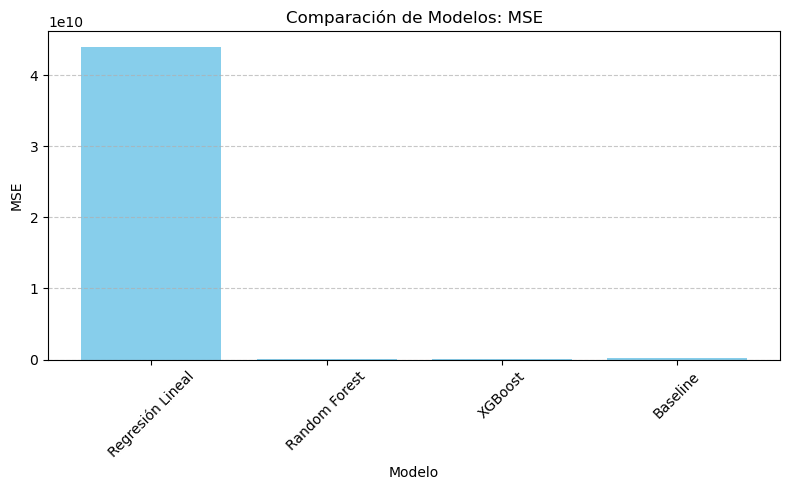

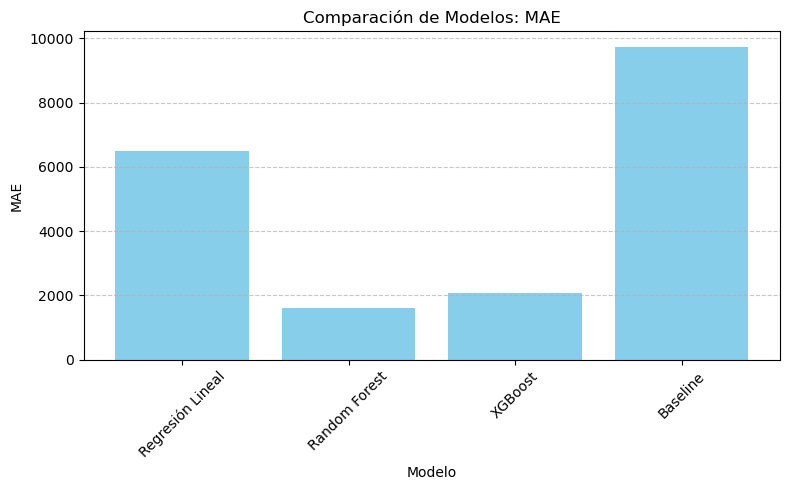

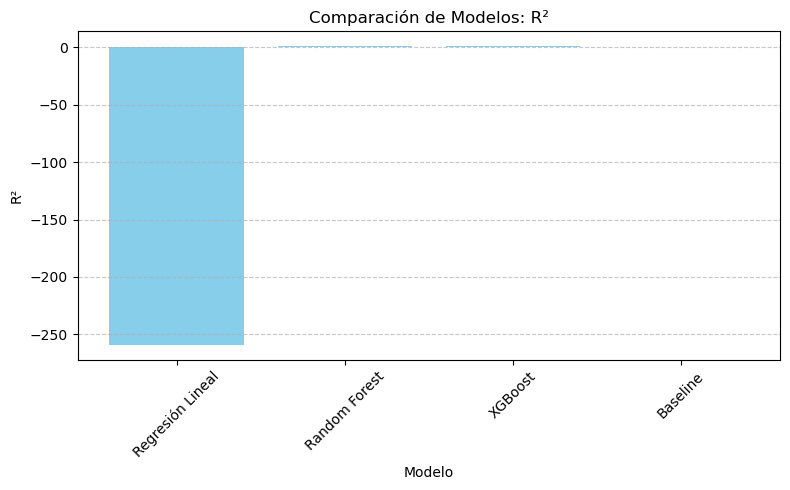

In [229]:
# Importar el DummyRegressor para crear un baseline
# Un baseline es un modelo simple que actúa como referencia para evaluar el rendimiento de los modelos más complejos.
# En este caso, el DummyRegressor utiliza la estrategia "mean", que predice siempre el promedio de los valores de la variable objetivo.
baseline = DummyRegressor(strategy="mean")

# Entrenar el baseline con el conjunto de entrenamiento
baseline.fit(X_train, y_train)

# Generar predicciones del baseline en el conjunto de prueba
baseline_pred = baseline.predict(X_test)

# Calcular métricas para el baseline
# Estas métricas (MSE, MAE y R2) servirán para comparar el desempeño de los modelos más avanzados frente al baseline.
baseline_mse = mean_squared_error(y_test, baseline_pred)  # Error Cuadrático Medio
baseline_mae = mean_absolute_error(y_test, baseline_pred)  # Error Absoluto Medio
baseline_r2 = r2_score(y_test, baseline_pred)  # Coeficiente de Determinación 

# Evaluar los modelos optimizados en el conjunto de prueba
# Se calculan las mismas métricas para cada modelo en "mejores_modelos".
resultados = []

for nombre, modelo in mejores_modelos.items():
    # Generar predicciones del modelo en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)  # Error Cuadrático Medio
    mae = mean_absolute_error(y_test, y_pred)  # Error Absoluto Medio
    r2 = r2_score(y_test, y_pred)  # Coeficiente de Determinación

    # Guardar los resultados en una lista para crear un DataFrame más adelante
    resultados.append({"Modelo": nombre, "MSE": mse, "MAE": mae, "R2": r2})

# Agregar los resultados del baseline al DataFrame de resultados
resultados.append({"Modelo": "Baseline", "MSE": baseline_mse, "MAE": baseline_mae, "R2": baseline_r2})

# Crear un DataFrame con los resultados de todos los modelos y el baseline
df_resultados = pd.DataFrame(resultados)

# Mostrar los resultados en formato tabular
print("\nResultados de Evaluación:")
print(df_resultados)

# Visualización de métricas (gráfico individual por métrica)
# Para cada métrica (MSE, MAE y R²), se genera un gráfico de barras comparativo.
metricas = ["MSE", "MAE", "R2"]

for metrica in metricas:
    plt.figure(figsize=(8, 5))
    # Crear un gráfico de barras para la métrica actual
    plt.bar(df_resultados["Modelo"], df_resultados[metrica], color='skyblue')

    # Personalizar el gráfico
    plt.title(f"Comparación de Modelos: {metrica}")  # Título del gráfico
    plt.ylabel(metrica)  # Etiqueta del eje Y
    plt.xlabel("Modelo")  # Etiqueta del eje X
    plt.xticks(rotation=45)  # Rotación de los nombres de los modelos para mejor visibilidad
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Líneas horizontales para facilitar la lectura

    # Ajustar el diseño para evitar que los elementos del gráfico se superpongan
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()



#### <span style="color:purple">Interpretación de los Resultados</span>

1. **Regresión Lineal:**

    - Tiene el mayor error cuadrático medio (MSE) y absoluto (MAE), lo que indica que este modelo tiene un desempeño significativamente pobre en comparación con otros modelos.
    - El coeficiente R2 negativo (-258.94) sugiere que este modelo no solo no logra explicar la variabilidad de los datos, sino que su predicción es peor que la media constante (Baseline).

2. **Random Forest:**

    - Este modelo muestra el mejor desempeño con un R2 de 0.941, indicando que explica el 94.1% de la variabilidad en los datos de prueba.
    - También tiene el menor error absoluto (MAE), lo que sugiere que sus predicciones están más cercanas a los valores reales.

3. **XGBoost:**

    - Aunque ligeramente inferior a Random Forest, XGBoost también presenta un desempeño sólido con un  R2 de 0.932 y un MAE de 2070. Esto lo convierte en una opción competitiva.

4. **Baseline (DummyRegressor):**

    - Este modelo simplemente predice la media de los valores de entrenamiento. Su R2 cercano a 0 y sus altos errores (MSE y MAE) confirman que no captura ninguna estructura subyacente en los datos.

---

**Visualización de los Resultados**

1. **MSE:** El modelo de Regresión Lineal tiene un error cuadrático medio extremadamente alto en comparación con los demás, reflejando su pobre ajuste a los datos. Random Forest y XGBoost tienen valores significativamente menores, siendo Random Forest el mejor.

2. **MAE:** Random Forest tiene el menor error absoluto, seguido por XGBoost. El Baseline y la Regresión Lineal tienen errores significativamente mayores.

3. **R2:** Random Forest tiene el mejor coeficiente de determinación, seguido por XGBoost. El Baseline tiene un valor cercano a 0, y la Regresión Lineal presenta un desempeño negativo.

---

**<span style="color:olive">Conclusiones</span>**

- **Random Forest** es el modelo con el mejor desempeño general, seguido de cerca por XGBoost.
- **Regresión Lineal** no es adecuada para este problema debido a su alta dependencia en suposiciones lineales y su incapacidad para capturar relaciones no lineales en los datos.
- **El Baseline** demuestra cómo se comportaría un modelo sin aprendizaje alguno, resaltando la utilidad de Random Forest y XGBoost en este caso.
- En resumen, **Random Forest** es el modelo recomendado para este conjunto de datos debido a su bajo error y alta capacidad de explicación de la variabilidad (R2).

---
---

## <span style="color:orange">Conclusión Final y Próximos Pasos</span>

**Los resultados obtenidos demuestran que los modelos de aprendizaje automático tienen un potencial significativo para abordar el problema propuesto**. A través del análisis realizado, se destaca que:

- **Random Forest** es el modelo más efectivo para predecir la variable objetivo, con un **R2 de 0.941**. Esto significa que es capaz de explicar el **94.1%** de la variabilidad de los datos, lo que lo convierte en una herramienta confiable para la toma de decisiones.

- **XGBoost**, aunque ligeramente inferior al Random Forest, también ofrece un desempeño sólido con un **R2 de 0.932**, lo que lo convierte en una opción complementaria o alternativa.

- **Regresión Lineal y el modelo Baseline (Dummy)** tienen un desempeño insuficiente para este problema, ya que no logran capturar la complejidad de los datos y presentan errores considerablemente altos.

**La capacidad de los modelos Random Forest y XGBoost para capturar relaciones no lineales y su bajo error absoluto (MAE) hacen que los resultados sean útiles para el problema planteado, proporcionando predicciones precisas que pueden respaldar decisiones críticas.**

---

**<span style="color:teal">Utilidad de los Resultados</span>**

- Los modelos entrenados pueden ser aplicados para:

    - Predecir valores futuros con alta precisión, optimizando procesos o estrategias relacionadas con el negocio.
    - Identificar patrones subyacentes en los datos, lo que permite entender mejor los factores que afectan la variable objetivo.
    - Comparar las decisiones basadas en estos modelos frente a enfoques tradicionales, validando su impacto positivo en los resultados.

---

**<span style="color:teal">Próximos Pasos</span>**

Para continuar desarrollando este proyecto y mejorar los resultados obtenidos, se proponen las siguientes acciones:

1. **Refinamiento de los Modelos:**

    - Explorar otras configuraciones de hiperparámetros para Random Forest y XGBoost para identificar configuraciones aún más optimizadas.
    - Evaluar otros algoritmos avanzados.

2. **Análisis de las Variables:**

    - Identificar las variables más importantes en los modelos (feature importance) para entender qué factores tienen mayor influencia en las predicciones.
    - Eliminar variables redundantes o no significativas para simplificar los modelos.

3. **Validación Cruzada:**

    - Implementar una validación cruzada más extensa para garantizar la robustez de los resultados y reducir el riesgo de sobreajuste.

4. **Ampliación del Dataset:**

    - Incorporar más datos históricos para mejorar la capacidad predictiva y generalización de los modelos.
    - Agregar nuevas variables que puedan enriquecer el análisis, como factores externos o contextuales.

5. **Monitoreo y Mejora Continua:**

    - Monitorear el desempeño del modelo una vez implementado para detectar posibles desviaciones.
    - Actualizar el modelo periódicamente con nuevos datos para mantener su precisión.

---

**<span style="color:teal">Conclusión General</span>**

- **Los resultados obtenidos no solo cumplen con los objetivos iniciales del proyecto, sino que también establecen una base sólida para futuras mejoras.**
- Los próximos pasos estarán enfocados en la optimización, validación y despliegue práctico de los modelos, maximizando su utilidad para resolver el problema planteado y generando un impacto positivo en la toma de decisiones.